# Global Power Plant Database

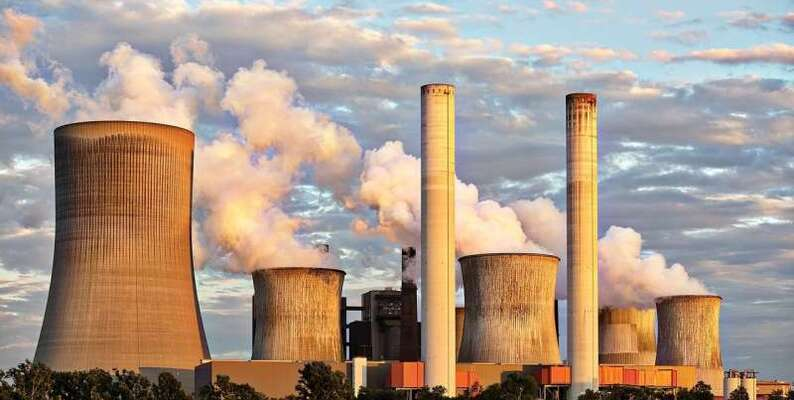

# Problem Statement:

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

* <b>country (text):</b> 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]


* <b>country_long (text):</b> longer form of the country designation


* <b>name (text):</b> name or title of the power plant, generally in Romanized form


* <b>gppd_idnr (text):</b> 10 or 12 character identifier for the power plant


* <b>capacity_mw (number):</b> electrical generating capacity in megawatts


* latitude (number):</b> geolocation in decimal degrees; WGS84 (EPSG:4326)


* <b>longitude (number):</b> geolocation in decimal degrees; WGS84 (EPSG:4326)


* <b>primary_fuel (text):</b> energy source used in primary electricity generation or export


* <b>other_fuel1 (text):</b> energy source used in electricity generation or export


* <b>other_fuel2 (text):</b> energy source used in electricity generation or export


* <b>other_fuel3 (text):</b> energy source used in electricity generation or export


* <b>commissioning_year (number):</b> year of plant operation, weighted by unit-capacity when data is available


* <b>owner (text):</b> majority shareholder of the power plant, generally in Romanized form


* <b>source (text):</b> entity reporting the data; could be an organization, report, or document, generally in Romanized form


* <b>url (text):</b> web document corresponding to the source field


* <b>geolocation_source (text):</b> attribution for geolocation information


* <b>wepp_id (text):</b> a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.


* <b>year_of_capacity_data (number):</b> year the capacity information was reported


* <b>generation_gwh_2013 (number):</b> electricity generation in gigawatt-hours reported for the year 2013


* <b>generation_gwh_2014 (number):</b> electricity generation in gigawatt-hours reported for the year 2014


* <b>generation_gwh_2015 (number):</b> electricity generation in gigawatt-hours reported for the year 2015


* <b>generation_gwh_2016 (number):</b> electricity generation in gigawatt-hours reported for the year 2016


* <b>generation_gwh_2017 (number):</b> electricity generation in gigawatt-hours reported for the year 2017


* <b>generation_gwh_2018 (number):</b> electricity generation in gigawatt-hours reported for the year 2018


* <b>generation_gwh_2019 (number):</b> electricity generation in gigawatt-hours reported for the year 2019


* <b>generation_data_source (text):</b> attribution for the reported generation information


* <b>estimated_generation_gwh_2013 (number):</b> estimated electricity generation in gigawatt-hours for the year 2013


* <b>estimated_generation_gwh_2014 (number):</b> estimated electricity generation in gigawatt-hours for the year 2014


* <b>estimated_generation_gwh_2015 (number):</b> estimated electricity generation in gigawatt-hours for the year 2015


* <b>estimated_generation_gwh_2016 (number):</b> estimated electricity generation in gigawatt-hours for the year 2016


* <b>estimated_generation_gwh_2017 (number):</b> estimated electricity generation in gigawatt-hours for the year 2017


* <b>estimated_generation_note_2013 (text):</b> label of the model/method used to estimate generation for the year 2013


* <b>estimated_generation_note_2014 (text):</b> label of the model/method used to estimate generation for the year 2014


* <b>estimated_generation_note_2015 (text):</b> label of the model/method used to estimate generation for the year 2015


* <b>estimated_generation_note_2016 (text):</b> label of the model/method used to estimate generation for the year 2016


* <b>estimated_generation_note_2017 (text):</b> label of the model/method used to estimate generation for the year 2017

# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction

<b>1) Primary Fuel     
2) capacity_mw</b>

# Model 1

<b>Here, primary_fuel is the target variable.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('database_IND.csv')

df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [5]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [6]:
df.sample(3)

country country_long                             name   gppd_idnr  \
860     IND        India                            URUMI  IND0000488   
239     IND        India                            GUMTI  IND0000135   
114     IND        India  Bap - GIS 1-2 Solar Power Plant  WRI1026115   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
860         3.75   11.3727    76.0584        Hydro         NaN         NaN   
239        15.00   23.4263    91.8223        Hydro         NaN         NaN   
114        15.00   27.3827    72.3188        Solar         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
860  ...                 2019.0                  NaN                 NaN   
239  ...                 2019.0                  NaN                 NaN   
114  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
860                 NaN                 NaN                 NaN   
239                 NaN                 NaN                 NaN   
114                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  generation_data_source  \
860                  NaN                  NaN                     NaN   
239                  NaN                  NaN                     NaN   
114                  NaN                  NaN                     NaN   

     estimated_generation_gwh  
860                       NaN  
239                       NaN  
114                       NaN  

[3 rows x 27 columns]

In [7]:
df.shape

(907, 27)

<b>The dataset consists of 907 rows and 27 columns.</b>

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:
# Let's check the number of unique values present in the dataset

df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

<b>As we can see, the columns 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019' and  'estimated_generation_gwh' do not contain any unique values. So, let's drop these 5 columns.</b>

In [11]:
df.drop(columns=['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1, inplace=True)

In [12]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                                source  \
0    ...  National Renewable Energy Laboratory   
1    ...                  Ultratech Cement ltd   
2    ...                                   CDM   
3    ...         Central Electricity Authority   
4    ...         Central Electricity Authority   
..   ...                                   ...   
902  ...         Central Electricity Authority   
903  ...   Karnataka Power Corporation Limited   
904  ...                                   CDM   
905  ...                    Hindustan Zinc ltd   
906  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

    generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                   NaN                  NaN          

<b> Now, we are left with 907 rows and 22 columns.</b>

<b>As we can see, the columns 'country', 'country_long', 'other_fuel2', 'year_of_capacity_data' and 'generation_data_source' have only a single unique value. This means, all the entries in these columns are the same. Thus, let's drop these 5 columns, as they serve no purpose in our analysis.</b>

In [13]:
df.drop(columns=['country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source'], axis=1, inplace=True)

In [14]:
df

name   gppd_idnr  capacity_mw  latitude  \
0                ACME Solar Tower  WRI1020239          2.5   28.1839   
1             ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663   
2        AES Saurashtra Windfarms  WRI1026669         39.2   21.9038   
3                     AGARTALA GT  IND0000001        135.0   23.8712   
4                    AKALTARA TPP  IND0000002       1800.0   21.9603   
..                            ...         ...          ...       ...   
902                  YERMARUS TPP  IND0000513       1600.0   16.2949   
903  Yelesandra Solar Power Plant  WRI1026222          3.0   12.8932   
904  Yelisirur wind power project  WRI1026776         25.5   15.2758   
905                   ZAWAR MINES  WRI1019901         80.0   24.3500   
906       iEnergy Theni Wind Farm  WRI1026761         16.5    9.9344   

     longitude primary_fuel other_fuel1  commissioning_year  \
0      73.2407        Solar         NaN              2011.0   
1      74.6090         Coal         NaN                 NaN   
2      69.3732         Wind         NaN                 NaN   
3      91.3602          Gas         NaN              2004.0   
4      82.4091         Coal         Oil              2015.0   
..         ...          ...         ...                 ...   
902    77.3568         Coal         Oil              2016.0   
903    78.1654        Solar         NaN                 NaN   
904    75.5811         Wind         NaN                 NaN   
905    73.7477         Coal         NaN                 NaN   
906    77.4768         Wind         NaN                 NaN   

                                   owner  \
0                            Solar Paces   
1                   Ultratech Cement ltd   
2                                    AES   
3                                    NaN   
4                                    NaN   
..                                   ...   
902                                  NaN   
903  Karnataka Power Corporation Limited   
904                                  NaN   
905                   Hindustan Zinc ltd   
906                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI     

<b> Now, we are left with 907 rows and 17 columns.</b>

<b>As we can see, the columns 'name' and 'gppd_idnr' have all unique values. So, let's drop these 2 columns as well.</b> 

In [15]:
df.drop(columns=['name', 'gppd_idnr'], axis=1, inplace=True)

In [16]:
df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                                owner  \
0                2011.0                          Solar Paces   
1                   NaN                 Ultratech Cement ltd   
2                   NaN                                  AES   
3                2004.0                                  NaN   
4                2015.0                                  NaN   
..                  ...                                  ...   
902              2016.0                                  NaN   
903                 NaN  Karnataka Power Corporation Limited   
904                 NaN                                  NaN   
905                 NaN                   Hindustan Zinc ltd   
906                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.57

<b>Now, we are left with 907 rows and 15 columns.</b>

<b>The columns 'other_fuel1', 'owner' and 'url' serve no purpose in our analysis. So, let's drop these columns as well.</b>

In [17]:
df.drop(columns=['other_fuel1', 'owner', 'url'], axis=1, inplace=True)

In [18]:
df

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal                 NaN   
2           39.2   21.9038    69.3732         Wind                 NaN   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar                 NaN   
904         25.5   15.2758    75.5811         Wind                 NaN   
905         80.0   24.3500    73.7477         Coal                 NaN   
906         16.5    9.9344    77.4768         Wind                 NaN   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  
0                    NaN  
1                    NaN  
2                    NaN  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903                  NaN  
904                  NaN  
905                  NaN  
906                  NaN  

[907 rows x 12 columns]

<b>Now, we are left with 907 rows and 12 columns.</b>

In [19]:
# Let's check the number of unique values present in the dataset

df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

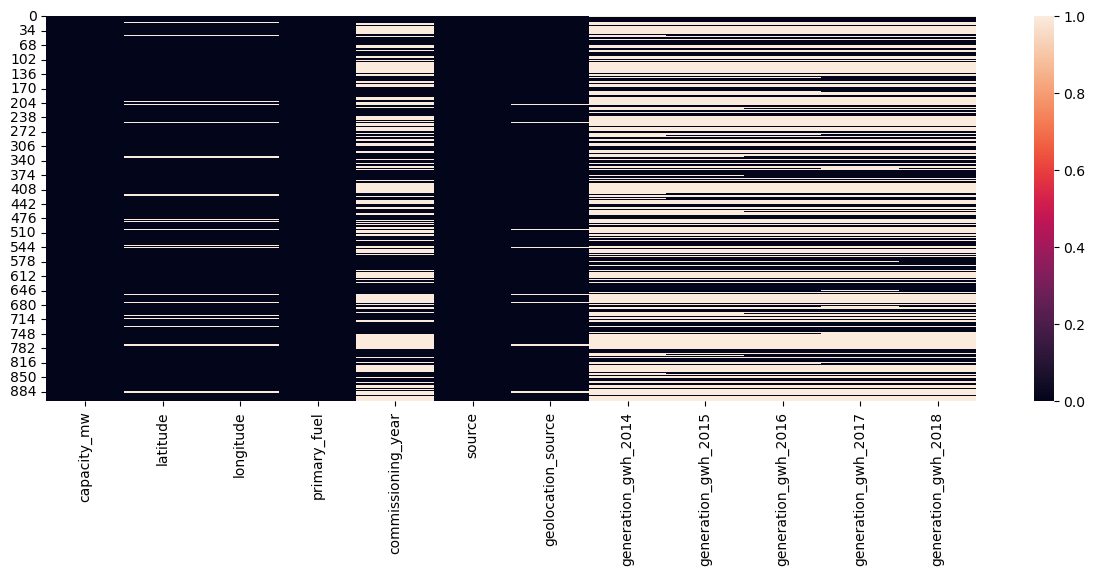

In [20]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> From the heat map above, we can confirm that null values are present in the dataset.</b>

# Imputing null values

In [21]:
from sklearn.impute import SimpleImputer

SI = SimpleImputer()

In [22]:
# Let's impute the columns 'latitude' and 'longitude' using the mean

df['latitude'] = SI.fit_transform(df['latitude'].values.reshape(-1,1))
df['longitude'] = SI.fit_transform(df['longitude'].values.reshape(-1,1))

In [23]:
SI = SimpleImputer(strategy='median')

df['generation_gwh_2014'] = SI.fit_transform(df['generation_gwh_2014'].values.reshape(-1,1))
df['generation_gwh_2015'] = SI.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))
df['generation_gwh_2016'] = SI.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))
df['generation_gwh_2017'] = SI.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))
df['generation_gwh_2018'] = SI.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))

In [24]:
# Let's check the dataset again for any null values

df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [25]:
SI = SimpleImputer(strategy='most_frequent')

df['commissioning_year'] = SI.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['geolocation_source'] = SI.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [26]:
# Let's check the dataset again for any null values

df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

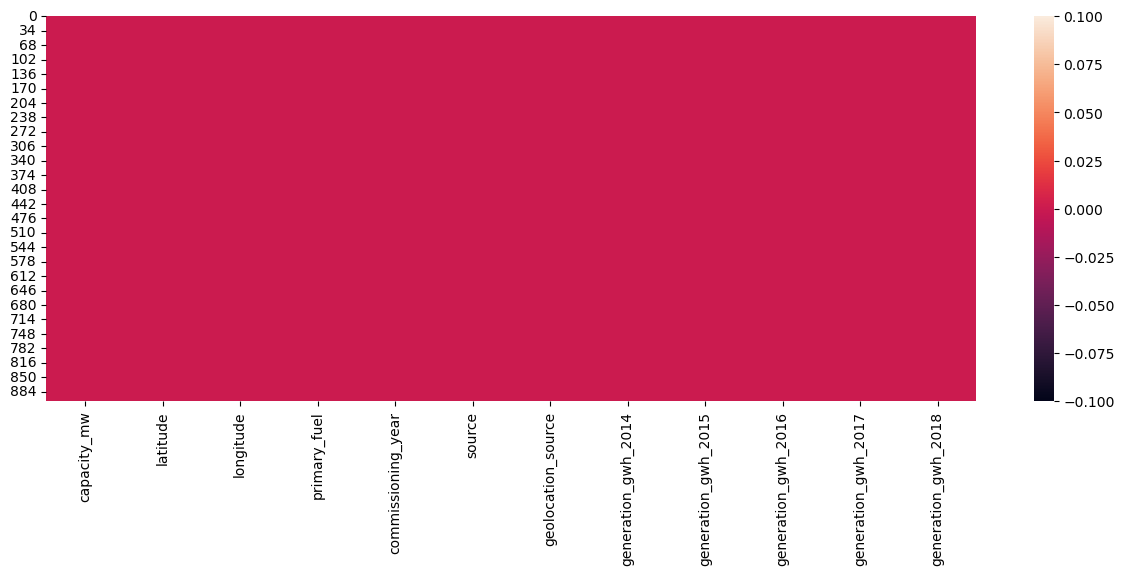

In [27]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> As we can see, there are no null values present in our dataset.</b>

In [28]:
# Now, let's check the uniqueness of the target variable, i.e., 'primary_fuel'

df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [29]:
# Now, let's check the value count of the target variable, i.e., 'W'

df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [30]:
# Now, let's check whether the dataset contains any space

df.loc[df['primary_fuel']==" "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []

<b>As we can see, there is no space in the dataset.</b>

# Statistical Description of the Dataset

In [31]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         2004.594267   
std     590.085456    6.079148    4.812291           15.734928   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2014.000000   
75%     385.250000   25.176450   79.206100         2015.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000

<b>This provides the statistical description of the data set.</b>
* As there are no negative / invalid values present in the dataset, we can say that the dataset appears perfect.
* There is very high standard deviation in all columns, except the columns 'latitude' and 'longitude'.
* There is a huge difference in mean and 2nd quantile of the column 'capacity_mw', which means that there are extreme outliers in this column.
* Mean and 2nd quantile of all the other columns are almost same.
* Mean of the column 'generation_gwh_2018' is high compared to other columns, which means the production is higher in 2018.</b>

<AxesSubplot:>

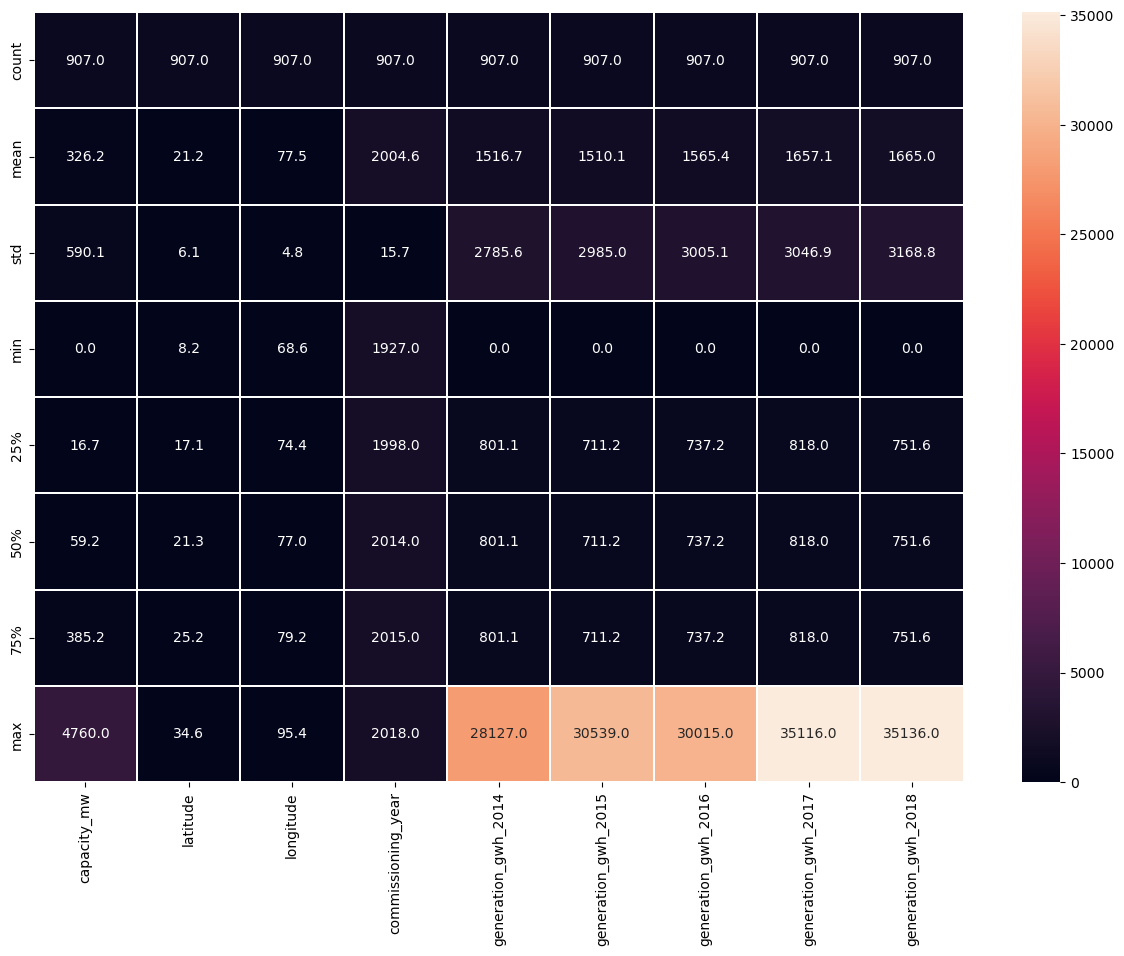

In [32]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,10))

sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True)

In [33]:
# Now, let's separate the categorical columns

categorical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['primary_fuel', 'source', 'geolocation_source']


In [34]:
# Now, let's separate the numerical columns

numerical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


# Data Visualization

# Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

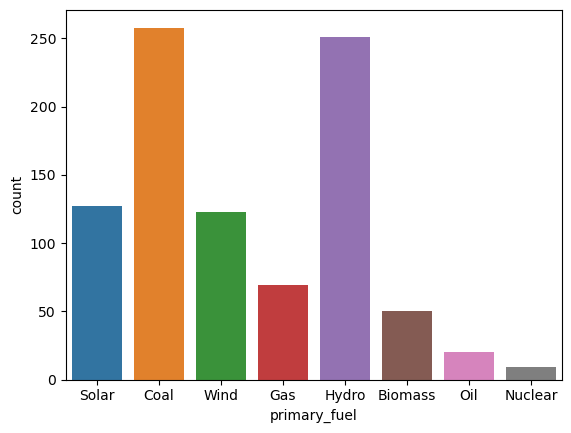

In [35]:
print(df['primary_fuel'].value_counts())
sns.countplot(df['primary_fuel'])

<b>As we can see, the primary fuel majorly used is Coal, followed by Hydro.</b>

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


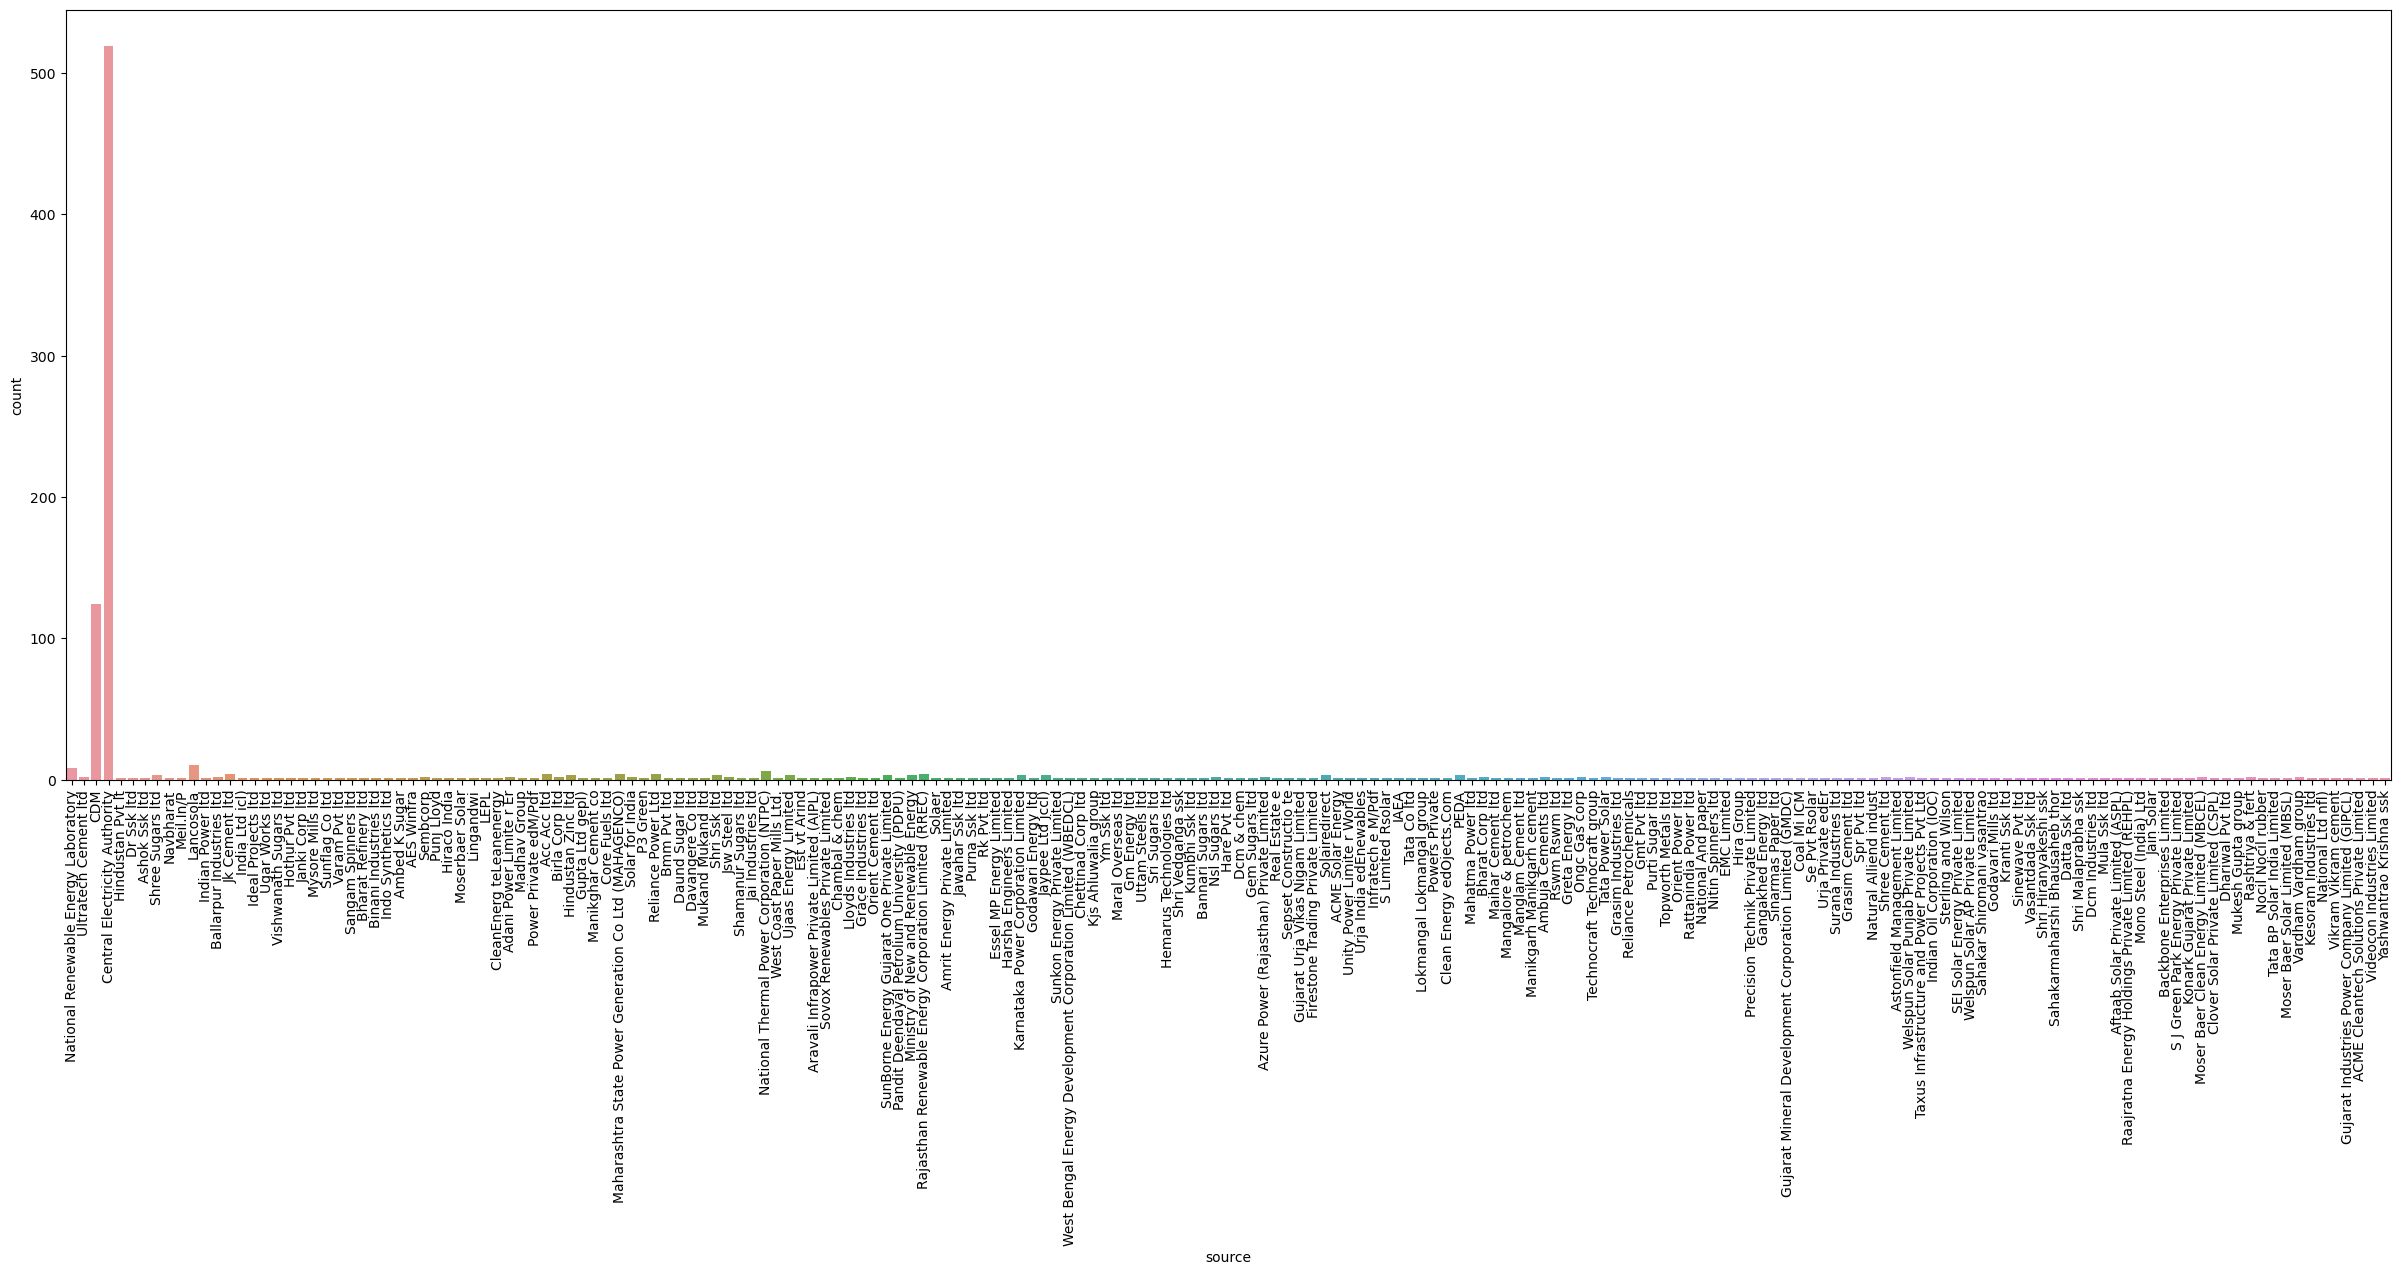

In [36]:
print(df['source'].value_counts())
plt.figure(figsize=(30,10))
sns.countplot(df['source'])
plt.xticks(rotation=90)
plt.show()

<b>As we can see, majority of the times, the source is Central Electricity Authority.</b>

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

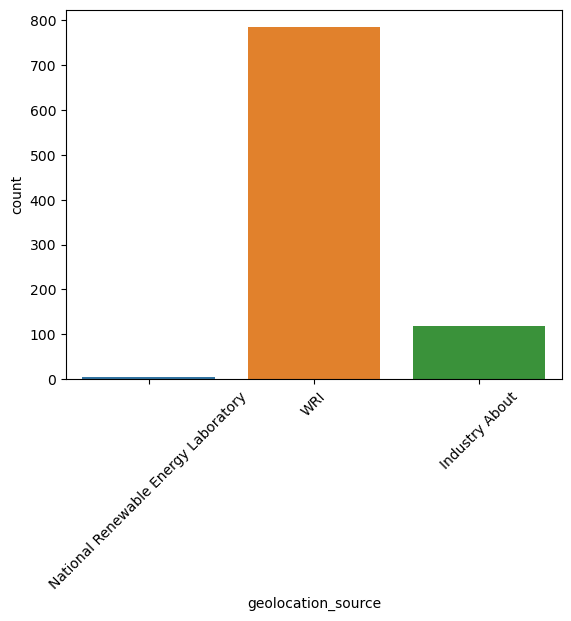

In [37]:
print(df['geolocation_source'].value_counts())
plt.xticks(rotation = 45)
sns.countplot(df['geolocation_source'])

<b>As we can see, majority of the times, the gelocation_source is WRI.</b>

# Checking the distribution of data for numerical columns

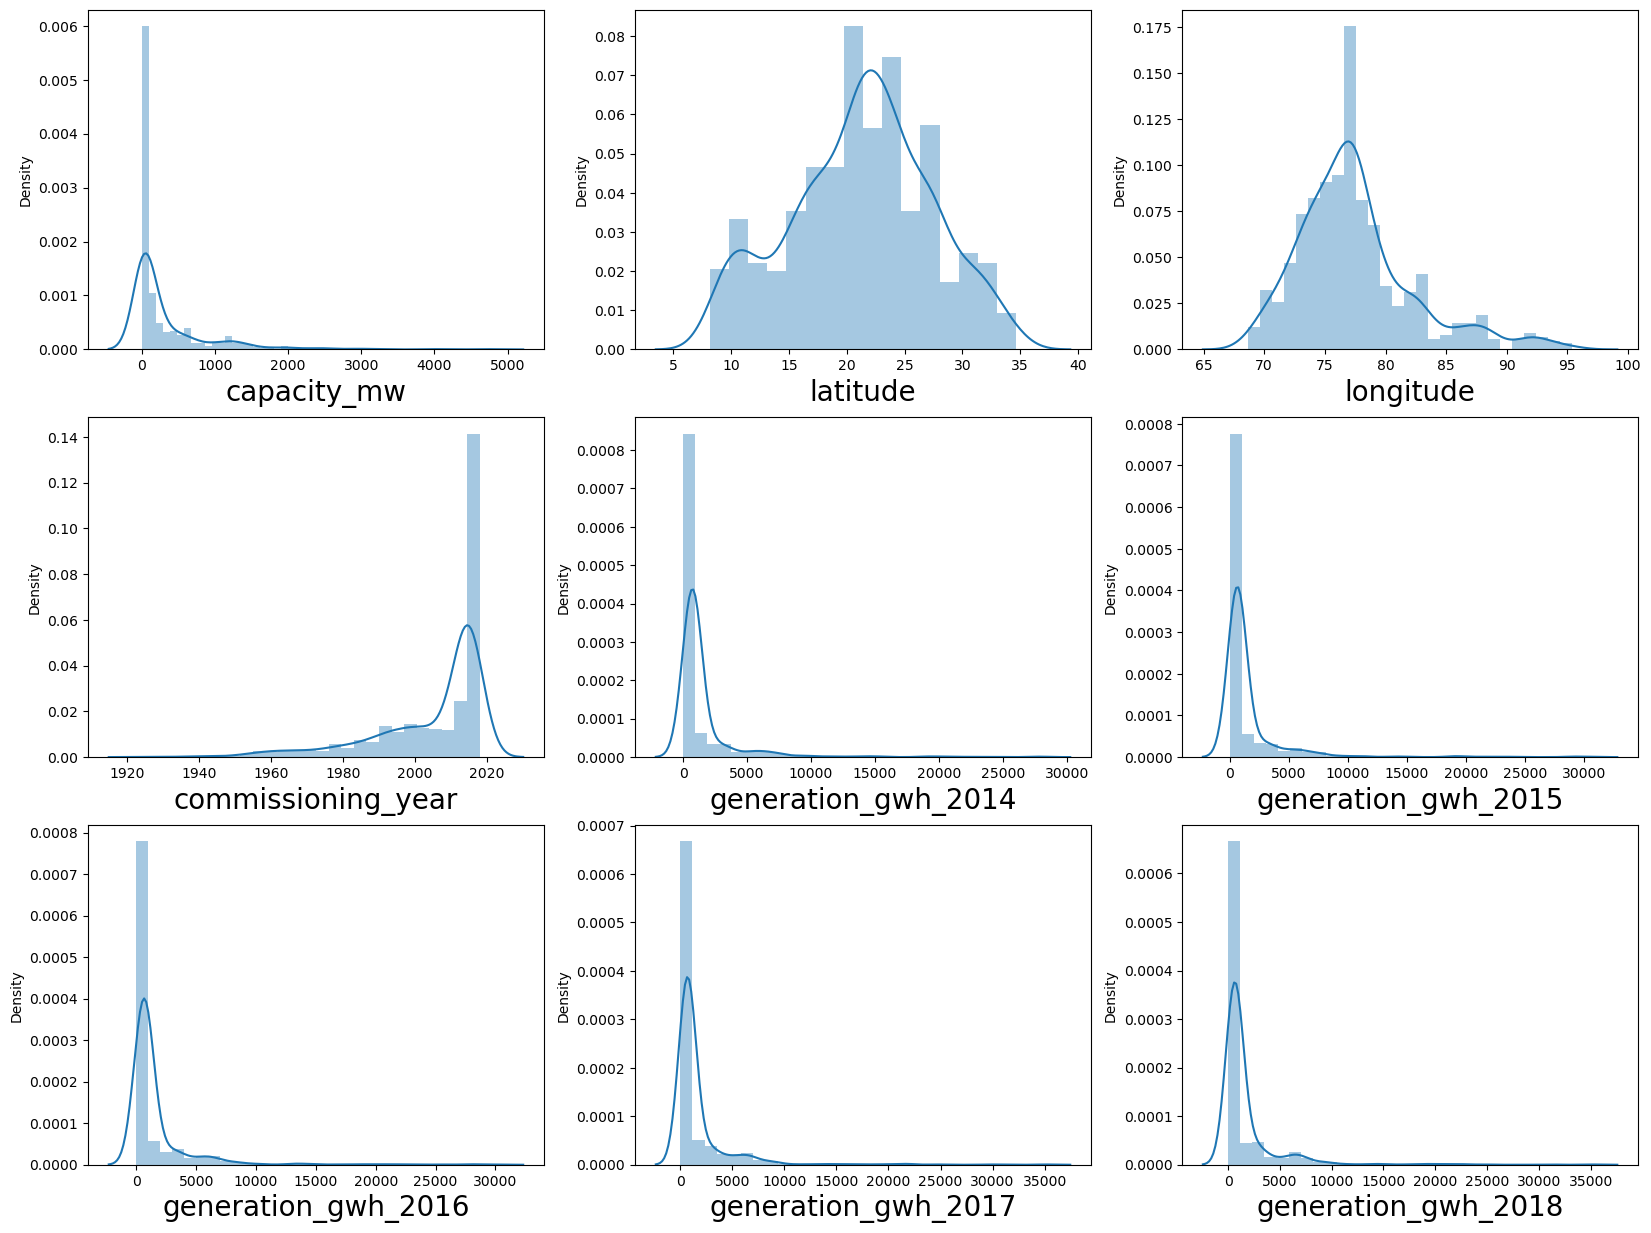

In [38]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

<b>From the distribution plot above, we can observe that skewness is present in all the columns.</b>.

# Bivariate Analysis

<AxesSubplot:title={'center':'Comparison between primary_fuel and capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

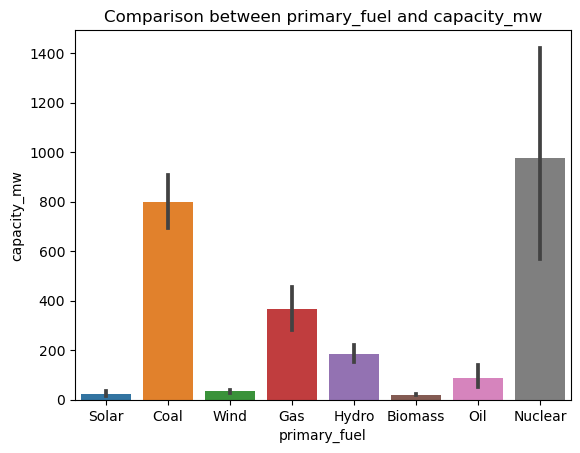

In [39]:
plt.title('Comparison between primary_fuel and capacity_mw')

x = df['primary_fuel']
y = df['capacity_mw']
sns.barplot(x,y)

<b>As we can see, Nuclear primary fuel has the highest capacity in megawatts, followed by Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and latitude'}, xlabel='primary_fuel', ylabel='latitude'>

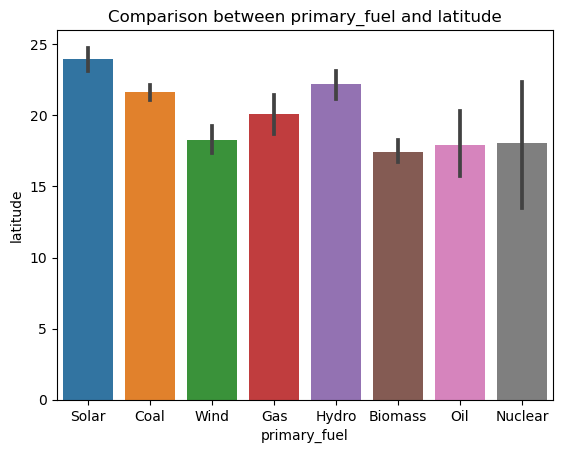

In [40]:
plt.title('Comparison between primary_fuel and latitude')

x = df['primary_fuel']
y = df['latitude']
sns.barplot(x,y)

<b>As we can see, Solar is used as a primary fuel in higher latitudes, followed by Hydro and Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and longitude'}, xlabel='primary_fuel', ylabel='longitude'>

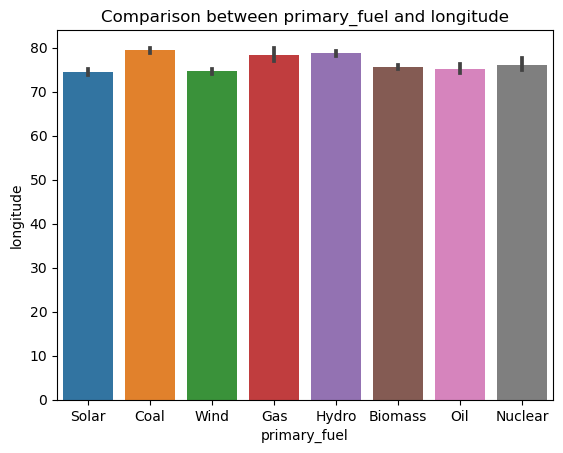

In [41]:
plt.title('Comparison between primary_fuel and longitude')

x = df['primary_fuel']
y = df['longitude']
sns.barplot(x,y)

<b>As we can see, Coal is used as a primary fuel in higher longitudes, followed by Hydro and Gas.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and commissioning_year'}, xlabel='primary_fuel', ylabel='commissioning_year'>

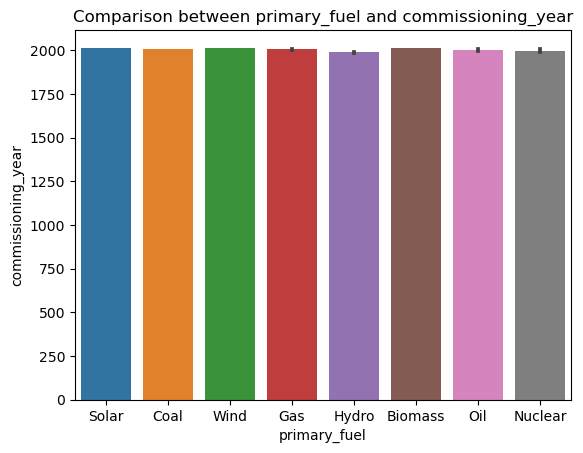

In [42]:
plt.title('Comparison between primary_fuel and commissioning_year')

x = df['primary_fuel']
y = df['commissioning_year']
sns.barplot(x,y)

<b>As we can see, commissioning year has no significant impact on primary fuel.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and generation_gwh_2014'}, xlabel='primary_fuel', ylabel='generation_gwh_2014'>

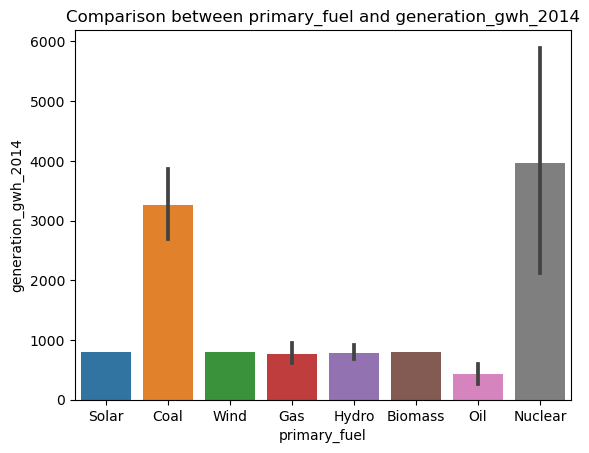

In [43]:
plt.title('Comparison between primary_fuel and generation_gwh_2014')

x = df['primary_fuel']
y = df['generation_gwh_2014']
sns.barplot(x,y)

<b>As we can see, majorly Nuclear was used as a primary fuel for the generation of electricity in the year 2014, followed by Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and generation_gwh_2015'}, xlabel='primary_fuel', ylabel='generation_gwh_2015'>

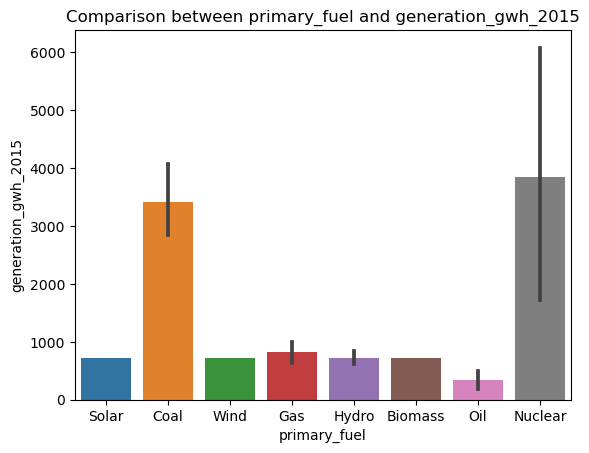

In [44]:
plt.title('Comparison between primary_fuel and generation_gwh_2015')

x = df['primary_fuel']
y = df['generation_gwh_2015']
sns.barplot(x,y)

<b>As we can see, majorly Nuclear was used as a primary fuel for the generation of electricity in the year 2015, followed by Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and generation_gwh_2016'}, xlabel='primary_fuel', ylabel='generation_gwh_2016'>

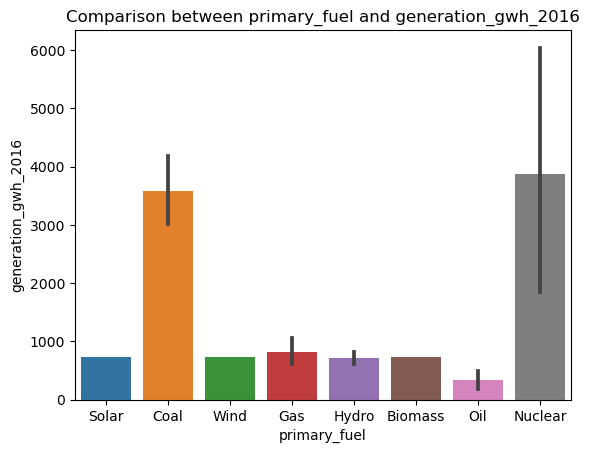

In [45]:
plt.title('Comparison between primary_fuel and generation_gwh_2016')

x = df['primary_fuel']
y = df['generation_gwh_2016']
sns.barplot(x,y)

<b>As we can see, majorly Nuclear was used as a primary fuel for the generation of electricity in the year 2016, followed by Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and generation_gwh_2017'}, xlabel='primary_fuel', ylabel='generation_gwh_2017'>

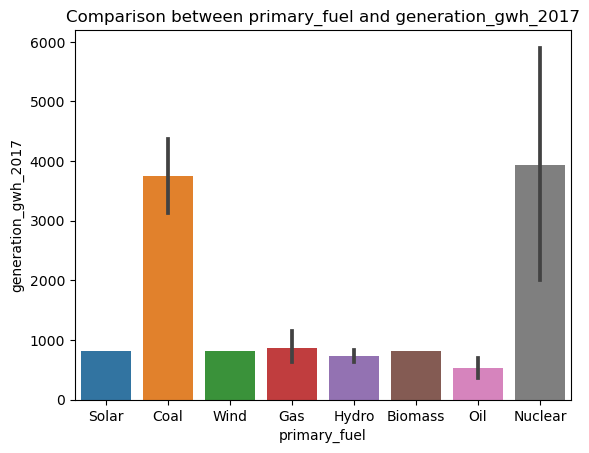

In [46]:
plt.title('Comparison between primary_fuel and generation_gwh_2017')

x = df['primary_fuel']
y = df['generation_gwh_2017']
sns.barplot(x,y)

<b>As we can see, majorly Nuclear was used as a primary fuel for the generation of electricity in the year 2017, followed by Coal.</b>

<AxesSubplot:title={'center':'Comparison between primary_fuel and generation_gwh_2018'}, xlabel='primary_fuel', ylabel='generation_gwh_2018'>

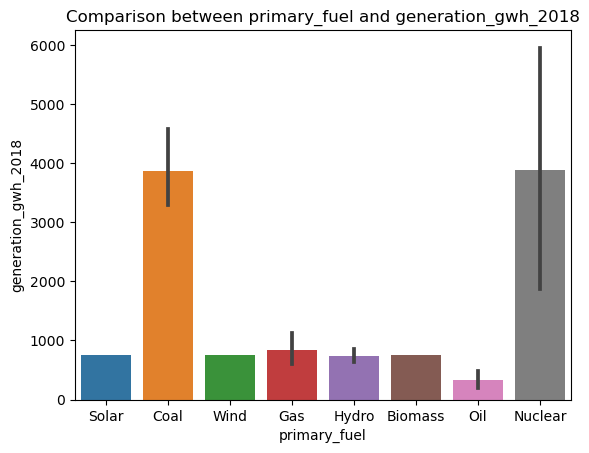

In [47]:
plt.title('Comparison between primary_fuel and generation_gwh_2018')

x = df['primary_fuel']
y = df['generation_gwh_2018']
sns.barplot(x,y)

<b>As we can see, majorly Nuclear was used as a primary fuel for the generation of electricity in the year 2018, followed by Coal.</b>

# Multivariate Analysis

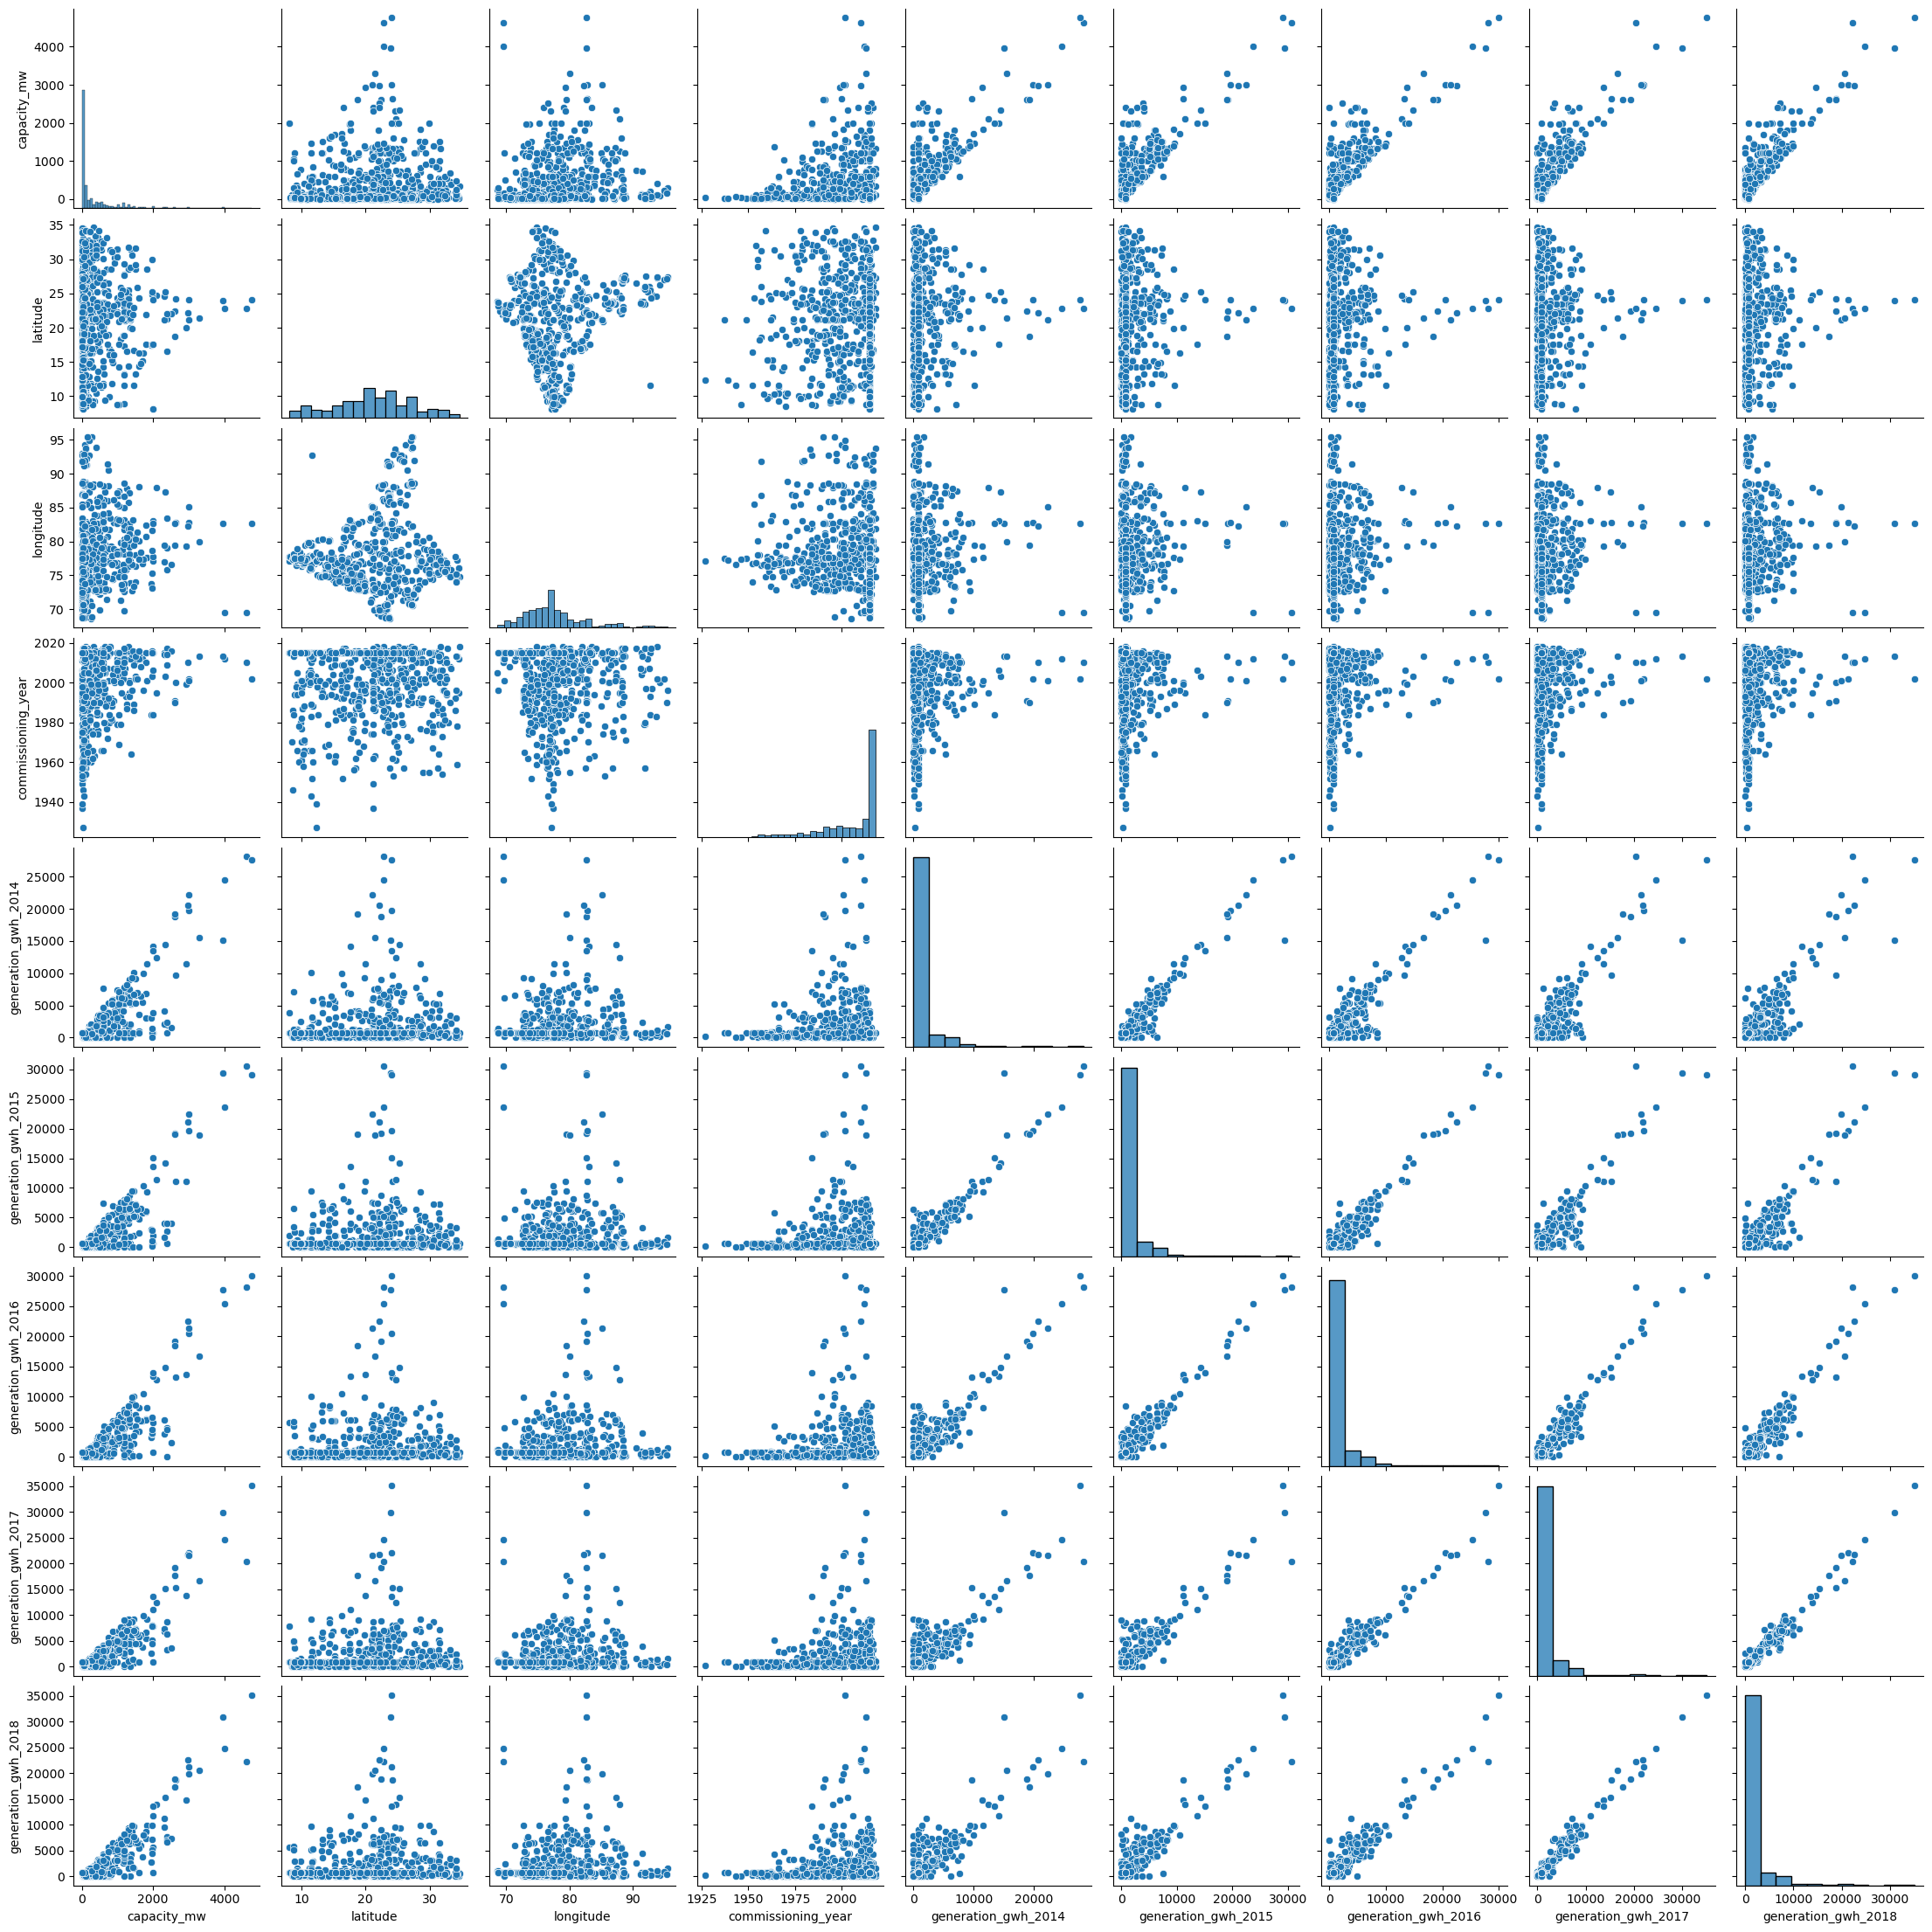

In [48]:
sns.pairplot(df)

# Outliers Detection

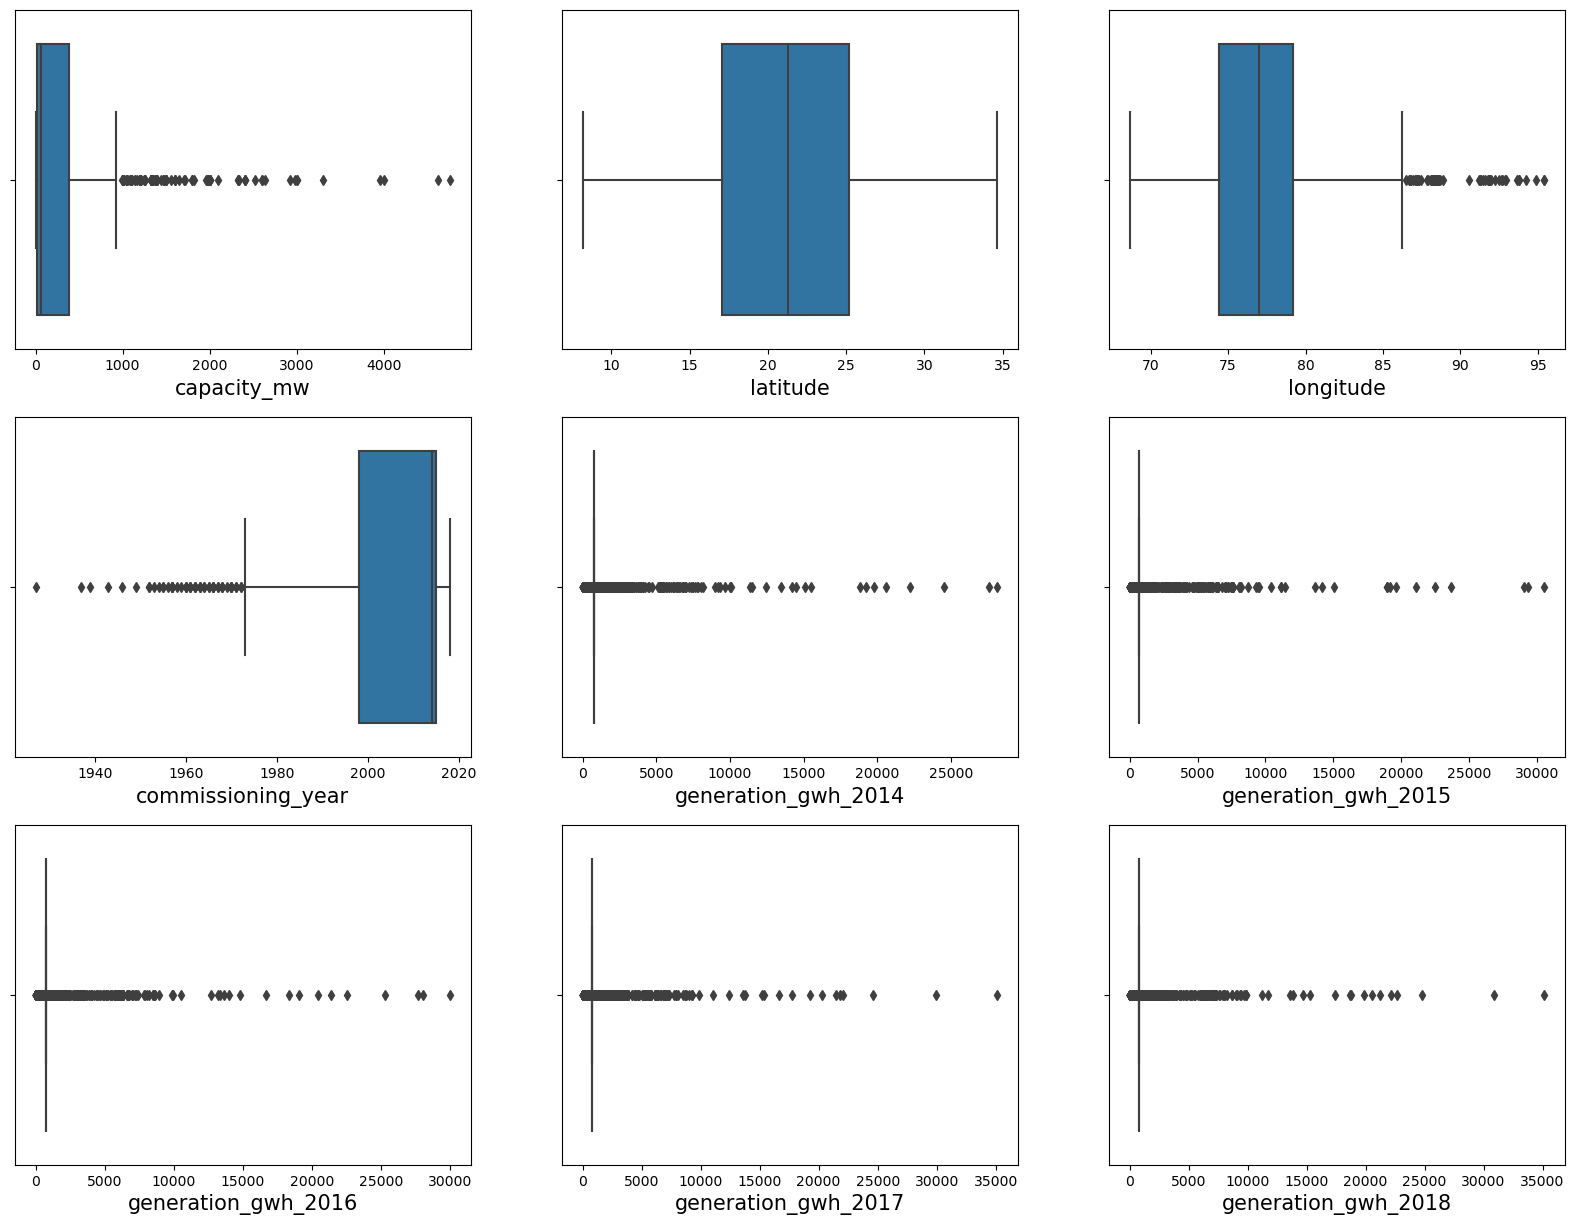

In [49]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

<b>As we can see, outliers are present in all the columns, except the column 'latitude'</b>

In [50]:
features = df[['capacity_mw', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

from scipy.stats import zscore

z = np.abs(zscore(features))

In [51]:
# Now, let's create a new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2015.0   
2           39.2   21.9038    69.3732         Wind              2015.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2015.0   
904         25.5   15.2758    75.5811         Wind              2015.0   
905         80.0   24.3500    73.7477         Coal              2015.0   
906         16.5    9.9344    77.4768         Wind              2015.0   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[848 rows x 12 columns]

In [52]:
print(df.shape) 
print(df_new.shape) 

(907, 12)
(848, 12)


# Percentage data loss

In [53]:
loss_percent = (907-848)/907*100
print(loss_percent, '%')

6.504961411245866 %


In [54]:
df_new.shape

(848, 12)

# Checking for Skewness

In [55]:
df_new.skew().sort_values()

commissioning_year    -1.540498
latitude              -0.113225
longitude              0.924298
capacity_mw            1.996260
generation_gwh_2017    2.601457
generation_gwh_2018    2.667010
generation_gwh_2016    2.702771
generation_gwh_2015    2.764042
generation_gwh_2014    2.964626
dtype: float64

<b>As all the columns do not lie in the range of +/-0.5, thus we can conclude that skewness is present in all the columns.</b>

# Removing Skewness using yeo-johnson method

In [56]:
skewed_features = ['commissioning_year', 'longitude', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2014', 'capacity_mw']

In [57]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [58]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()

commissioning_year  longitude  generation_gwh_2017  generation_gwh_2018  \
0            0.307512  -0.926786            -0.024077            -0.045715   
1            0.717618  -0.507777            -0.024077            -0.045715   
2            0.717618  -2.364043            -0.024077            -0.045715   
3           -0.325950   2.440084            -0.190297            -0.184852   
4            0.717618   1.254470             2.022370             2.413626   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2014  capacity_mw  
0            -0.040243            -0.039172            -0.036828    -1.677680  
1            -0.040243            -0.039172            -0.036828     0.234081  
2            -0.040243            -0.039172            -0.036828    -0.264685  
3             0.103243             0.113738            -0.261849     0.406960  
4             2.304422             2.302804             1.434001     1.760169

In [59]:
# Now, let's check the skewness again after applying yeo-johnson method

df_new.skew()

capacity_mw            0.015749
latitude              -0.113225
longitude              0.000123
commissioning_year    -1.104914
generation_gwh_2014    0.234635
generation_gwh_2015    0.168709
generation_gwh_2016    0.153749
generation_gwh_2017    0.131077
generation_gwh_2018    0.137150
dtype: float64

<b>We can see that the skewness has been removed.</b>

<b>Now, let's visualize the data using distplot.<b>

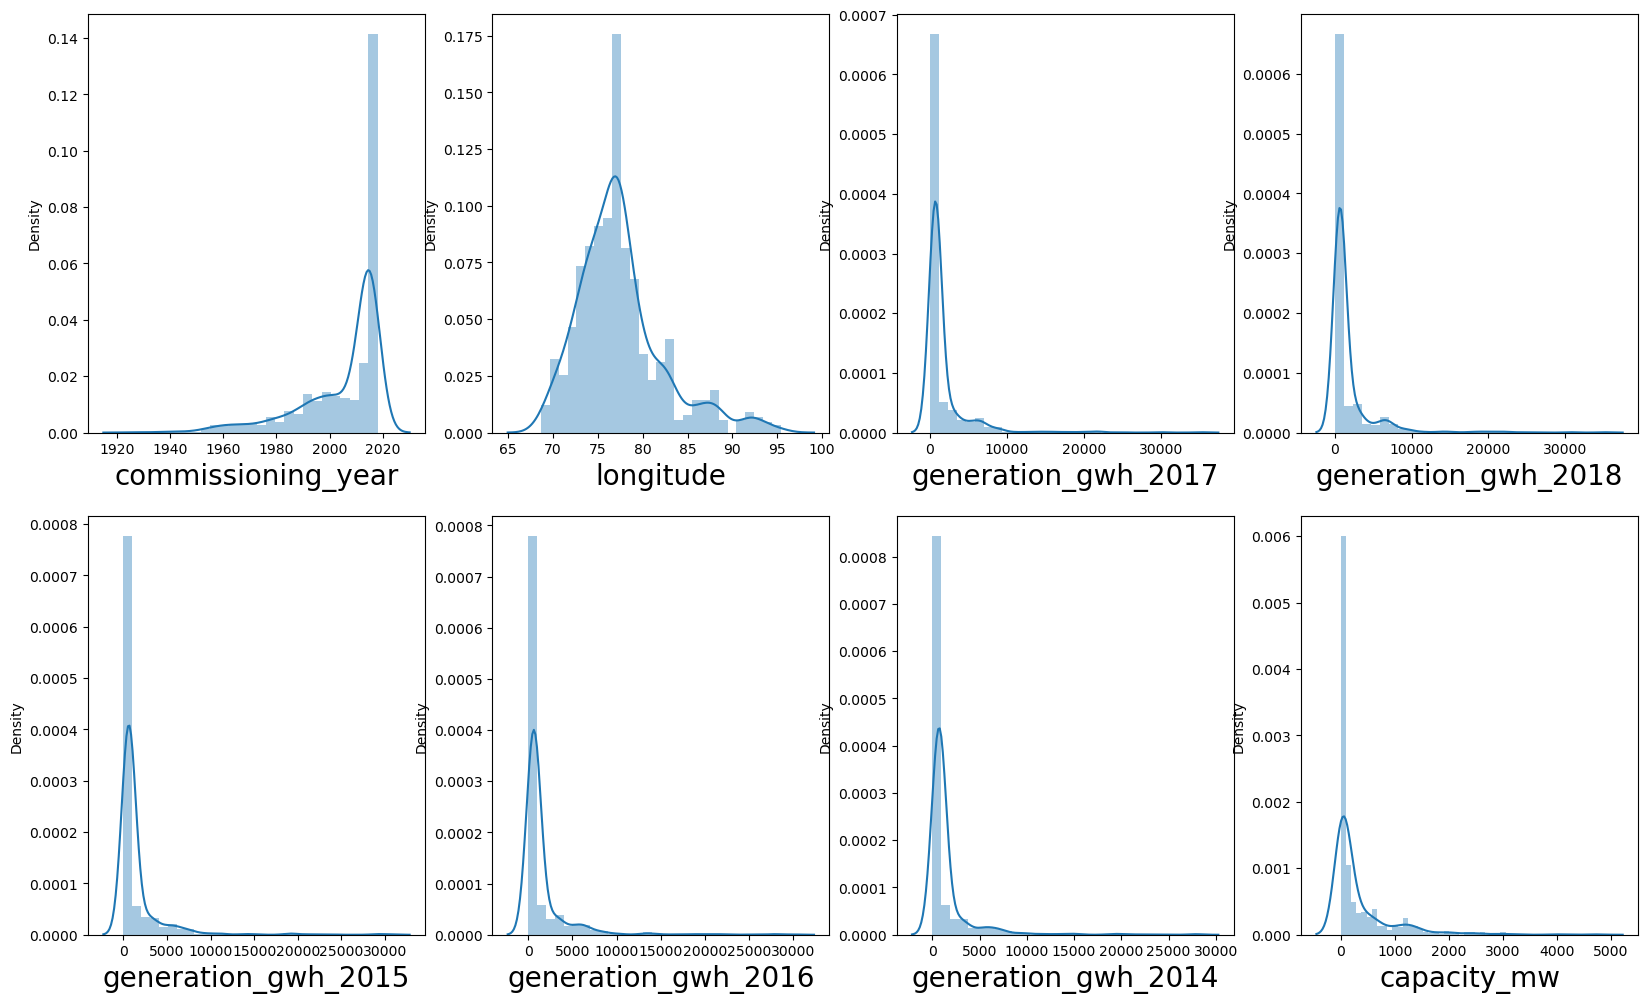

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skewed_features]:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Encoding the categorical columns using Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df_new[categorical_columns] = df_new[categorical_columns].apply(LE.fit_transform)
df_new[categorical_columns]

primary_fuel  source  geolocation_source
0               6     109                   1
1               1     174                   2
2               7      21                   2
3               2      22                   2
4               1      22                   2
..            ...     ...                 ...
902             1      22                   2
903             6      77                   0
904             7      21                   2
905             1      59                   2
906             7      21                   2

[848 rows x 3 columns]

# Correlation between features and labels

In [62]:
df_new.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.053846   0.336388     -0.522043   
latitude                0.053846  1.000000  -0.070520     -0.002418   
longitude               0.336388 -0.070520   1.000000     -0.405746   
primary_fuel           -0.522043 -0.002418  -0.405746      1.000000   
commissioning_year     -0.239916  0.027967  -0.180006      0.207762   
source                 -0.395962  0.069056  -0.241429      0.035891   
geolocation_source      0.477413 -0.202483   0.300815     -0.477847   
generation_gwh_2014     0.307301  0.107148   0.030219     -0.134392   
generation_gwh_2015     0.323980  0.101429   0.029606     -0.149812   
generation_gwh_2016     0.351536  0.119343   0.084960     -0.169248   
generation_gwh_2017     0.335235  0.103048   0.072753     -0.149800   
generation_gwh_2018     0.344624  0.110917   0.095729     -0.162296   

                     commissioning_year    source  geolocation_source  \
capacity_mw                   -0.239916 -0.395962            0.477413   
latitude                       0.027967  0.069056           -0.202483   
longitude                     -0.180006 -0.241429            0.300815   
primary_fuel                   0.207762  0.035891           -0.477847   
commissioning_year             1.000000  0.362179           -0.291186   
source                         0.362179  1.000000           -0.497535   
geolocation_source            -0.291186 -0.497535            1.000000   
generation_gwh_2014            0.012809 -0.018743            0.015025   
generation_gwh_2015            0.058275 -0.020481            0.016418   
generation_gwh_2016            0.128042 -0.019936            0.015982   
generation_gwh_2017            0.115113 -0.012254            0.009823   
generation_gwh_2018            0.104701 -0.023266            0.018651   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.307301             0.323980   
latitude                        0.107148             0.101429   
longitude                       0.030219             0.029606   
primary_fuel                   -0.134392            -0.149812   
commissioning_year              0.012809             0.058275   
source                         -0.018743            -0.020481   
geolocation_source              0.015025             0.016418   
generation_gwh_2014             1.000000             0.839747   
generation_gwh_2015             0.839747             1.000000   
generation_gwh_2016             0.783935             0.881666   
generation_gwh_2017             0.712494             0.770610   
generation_gwh_2018             0.717077             0.771435   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.351536             0.335235   
latitude                        0.119343             0.103048   
longitude                       0.084960             0.072753   
primary_fuel                   -0.169248            -0.149800   
commissioning_year              0.128042             0.115113   
source                         -0.019936            -0.012254   
geolocation_source              0.015982             0.009823   
generation_gwh_2014             0.783935             0.712494   
generation_gwh_2015             0.881666             0.770610   
generation_gwh_2016             1.000000             0.900782   
generation_gwh_2017             0.900782             1.000000   
generation_gwh_2018             0.895394             0.935870   

                     generation_gwh_2018  
capacity_mw                     0.344624  
latitude                        0.110917  
longitude                       0.095729  
primary_fuel                   -0.162296  
commissioning_year              0.104701  
source                         -0.023266  
geolocation_source              0.018651  
generation_gwh_2014             0.717077  
generation_gwh_2015             0.771435  
generation_gwh_2016      

# Correlation between features and labels using Heatmap

<AxesSubplot:>

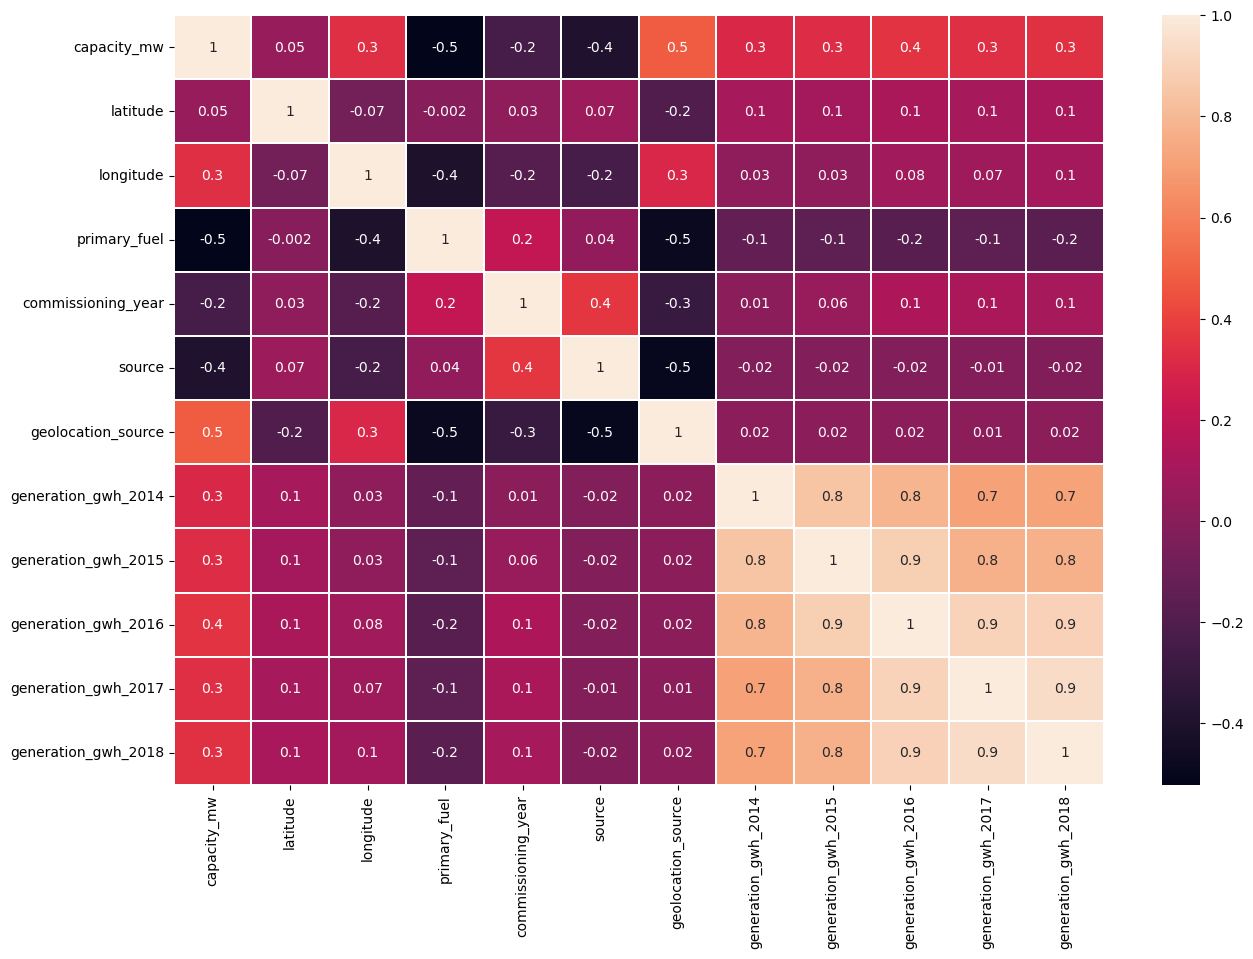

In [63]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_new.corr(), linewidths=0.1, fmt='.1g', annot = True)

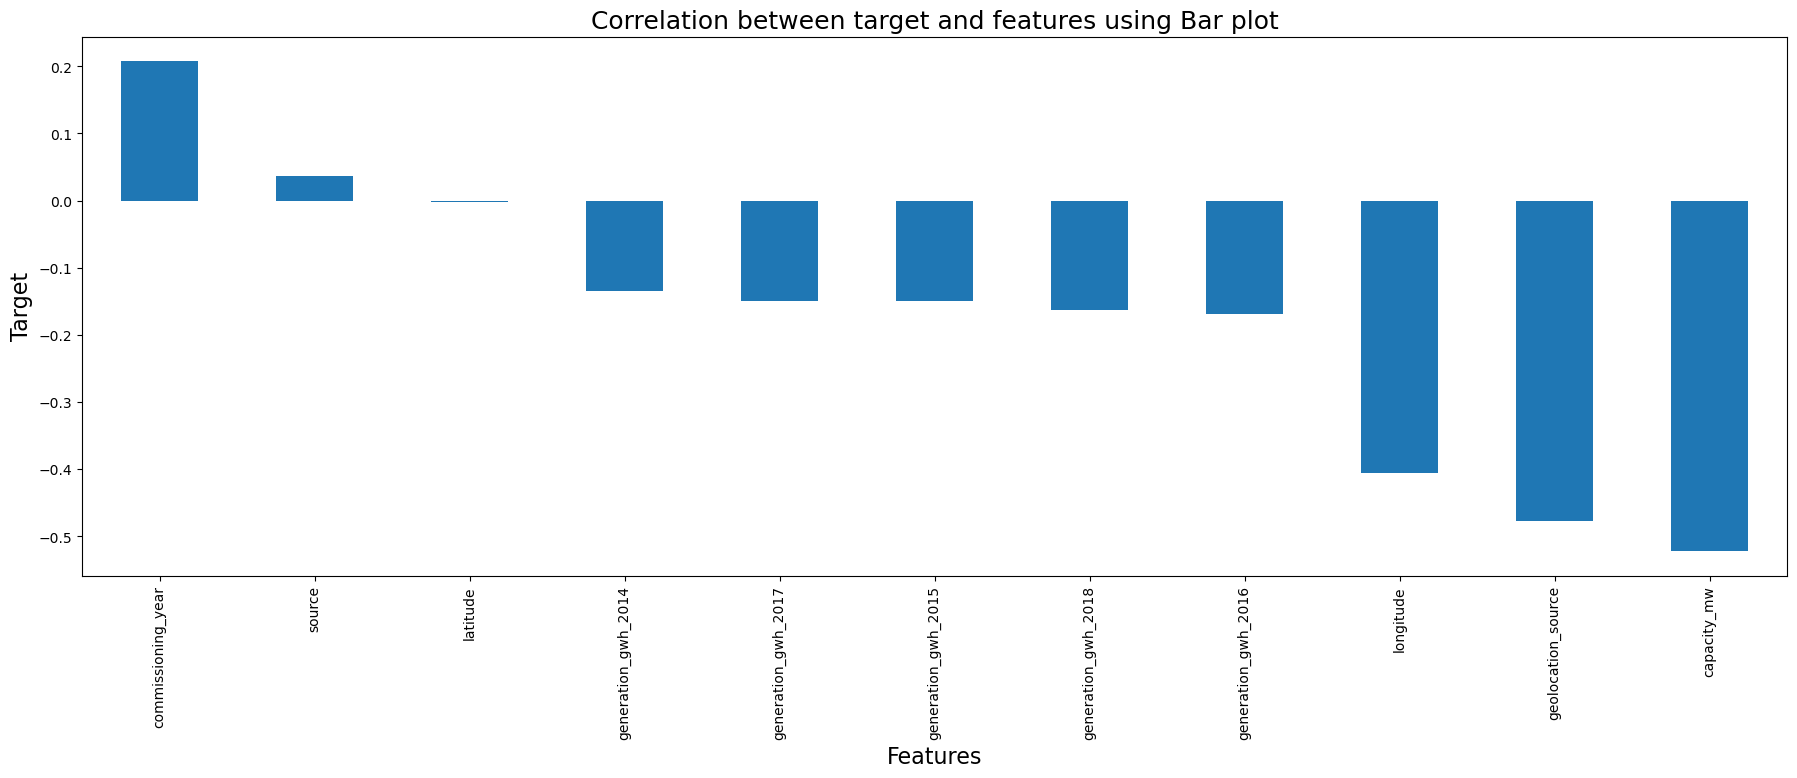

In [64]:
plt.figure(figsize=(22,7))
df_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

In [65]:
# Now, let's drop the column 'latitude'

df_new.drop('latitude',axis=1, inplace=True)
df_new.head()

capacity_mw  longitude  primary_fuel  commissioning_year  source  \
0    -1.677680  -0.926786             6            0.307512     109   
1     0.234081  -0.507777             1            0.717618     174   
2    -0.264685  -2.364043             7            0.717618      21   
3     0.406960   2.440084             2           -0.325950      22   
4     1.760169   1.254470             1            0.717618      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1            -0.036828            -0.040243   
1                   2            -0.036828            -0.040243   
2                   2            -0.036828            -0.040243   
3                   2            -0.261849             0.103243   
4                   2             1.434001             2.304422   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            -0.039172            -0.024077            -0.045715  
1            -0.039172            -0.024077            -0.045715  
2            -0.039172            -0.024077            -0.045715  
3             0.113738            -0.190297            -0.184852  
4             2.302804             2.022370             2.413626

In [66]:
df_new.shape

(848, 11)

<b>By checking out the shape of the dataset, we can confirm that the column 'latitude' has been deleted.</b>

# Seperating dependent and independent variables

In [67]:
x = df_new.drop('primary_fuel', axis=1)

y = df_new['primary_fuel']

In [68]:
x.shape

(848, 10)

In [69]:
y.shape

(848,)

# Data Standardization using Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

capacity_mw  longitude  commissioning_year    source  geolocation_source  \
0      -1.677680  -0.926786            0.307512  1.394327           -1.033559   
1       0.234081  -0.507777            0.717618  2.816310            0.407984   
2      -0.264685  -2.364042            0.717618 -0.530818            0.407984   
3       0.406960   2.440084           -0.325950 -0.508942            0.407984   
4       1.760169   1.254470            0.717618 -0.508942            0.407984   
..           ...        ...                 ...       ...                 ...   
843     1.700525   0.221238            0.826118 -0.508942            0.407984   
844    -1.597976   0.410817            0.717618  0.694274           -2.475103   
845    -0.499406  -0.233813            0.717618 -0.530818            0.407984   
846     0.124066  -0.766739            0.717618  0.300494            0.407984   
847    -0.735743   0.250035            0.717618 -0.530818            0.407984   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              -0.036828            -0.040243            -0.039172   
1              -0.036828            -0.040243            -0.039172   
2              -0.036828            -0.040243            -0.039172   
3              -0.261849             0.103243             0.113738   
4               1.434001             2.304422             2.302804   
..                   ...                  ...                  ...   
843            -0.036828            -2.463004            -0.840762   
844            -0.036828            -0.040243            -0.039172   
845            -0.036828            -0.040243            -0.039172   
846            -0.036828            -0.040243            -0.039172   
847            -0.036828            -0.040243            -0.039172   

     generation_gwh_2017  generation_gwh_2018  
0              -0.024077            -0.045715  
1              -0.024077            -0.045715  
2              -0.024077            -0.045715  
3              -0.190297            -0.184852  
4               2.022370             2.413626  
..                   ...                  ...  
843             0.022495            -0.115690  
844            -0.024077            -0.045715  
845            -0.024077            -0.045715  
846            -0.024077            -0.045715  
847            -0.024077            -0.045715  

[848 rows x 10 columns]

<b>The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values             Features
0    1.714447          capacity_mw
1    1.193800            longitude
2    1.261899   commissioning_year
3    1.484740               source
4    1.585797   geolocation_source
5    3.585371  generation_gwh_2014
6    6.265123  generation_gwh_2015
7   10.901944  generation_gwh_2016
8    9.700964  generation_gwh_2017
9    9.222091  generation_gwh_2018

<b> As the column 'generation_gwh_2016' has vif greater than 10, let's drop this column as well.</b>

In [72]:
x.drop(columns=['generation_gwh_2016'], axis=1, inplace=True)

In [73]:
x

capacity_mw  longitude  commissioning_year    source  geolocation_source  \
0      -1.677680  -0.926786            0.307512  1.394327           -1.033559   
1       0.234081  -0.507777            0.717618  2.816310            0.407984   
2      -0.264685  -2.364042            0.717618 -0.530818            0.407984   
3       0.406960   2.440084           -0.325950 -0.508942            0.407984   
4       1.760169   1.254470            0.717618 -0.508942            0.407984   
..           ...        ...                 ...       ...                 ...   
843     1.700525   0.221238            0.826118 -0.508942            0.407984   
844    -1.597976   0.410817            0.717618  0.694274           -2.475103   
845    -0.499406  -0.233813            0.717618 -0.530818            0.407984   
846     0.124066  -0.766739            0.717618  0.300494            0.407984   
847    -0.735743   0.250035            0.717618 -0.530818            0.407984   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2017  \
0              -0.036828            -0.040243            -0.024077   
1              -0.036828            -0.040243            -0.024077   
2              -0.036828            -0.040243            -0.024077   
3              -0.261849             0.103243            -0.190297   
4               1.434001             2.304422             2.022370   
..                   ...                  ...                  ...   
843            -0.036828            -2.463004             0.022495   
844            -0.036828            -0.040243            -0.024077   
845            -0.036828            -0.040243            -0.024077   
846            -0.036828            -0.040243            -0.024077   
847            -0.036828            -0.040243            -0.024077   

     generation_gwh_2018  
0              -0.045715  
1              -0.045715  
2              -0.045715  
3              -0.184852  
4               2.413626  
..                   ...  
843            -0.115690  
844            -0.045715  
845            -0.045715  
846            -0.045715  
847            -0.045715  

[848 rows x 9 columns]

In [74]:
vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values             Features
0    1.709498          capacity_mw
1    1.185369            longitude
2    1.231810   commissioning_year
3    1.483955               source
4    1.585369   geolocation_source
5    3.579316  generation_gwh_2014
6    4.358000  generation_gwh_2015
7    8.522490  generation_gwh_2017
8    8.632479  generation_gwh_2018

<b>As we can see, the vif value of all the columns is less than 10. Hence, we can conclude that the multicollinearity problem has been solved.</b>

In [75]:
y.value_counts()

1    233
3    222
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [76]:
from imblearn.over_sampling import RandomOverSampler  
ROS = RandomOverSampler()
x, y = ROS.fit_resample(x, y)
print(y.value_counts()) 

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64


In [77]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

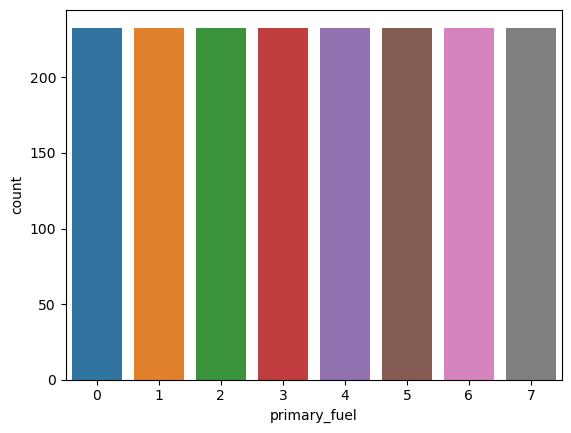

In [78]:
# Let's visualize the target variable 

sns.countplot(y)

# Finding best random state

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [80]:
from sklearn.tree import DecisionTreeClassifier

best_random_state = 0
best_score = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    model = DecisionTreeClassifier()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 1, accuracy score is 0.9276139410187667
At random score 2, accuracy score is 0.9302949061662198
At random score 3, accuracy score is 0.9088471849865952
At random score 4, accuracy score is 0.9463806970509383
At random score 5, accuracy score is 0.9517426273458445
At random score 6, accuracy score is 0.935656836461126
At random score 7, accuracy score is 0.9249329758713136
At random score 8, accuracy score is 0.9142091152815014
At random score 9, accuracy score is 0.9168900804289544
At random score 10, accuracy score is 0.9168900804289544
At random score 11, accuracy score is 0.9249329758713136
At random score 12, accuracy score is 0.9168900804289544
At random score 13, accuracy score is 0.9463806970509383
At random score 14, accuracy score is 0.9329758713136729
At random score 15, accuracy score is 0.9490616621983914
At random score 16, accuracy score is 0.9168900804289544
At random score 17, accuracy score is 0.9222520107238605
At random score 18, accuracy score is 0.9

# Train Test Split

In [82]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=90)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [84]:
classifiers = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), AdaBoostClassifier()]

In [85]:
nfolds = 10
kf = KFold(n_splits=nfolds, random_state=60, shuffle=True)
maxAUC = -1
bestCL = ""
for cl in classifiers:
    cl.fit(xtrain, ytrain)    
    cv = cross_val_score(cl,xtrain, ytrain, cv=kf).mean()
    pred_test=cl.predict(xtest)
    auc = accuracy_score(ytest,pred_test)
    
    print (str(cl) + ' ' + str(auc))
    print("CV Score: ", cv)
    print(confusion_matrix(ytest, pred_test))
    print(classification_report(ytest,pred_test))
    
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
        
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

RandomForestClassifier() 0.9839142091152815
CV Score:  0.9396465324384786
[[49  0  0  0  0  0  0  0]
 [ 3 33  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0]
 [ 0  3  0 47  0  0  0  0]
 [ 0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 50]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       0.92      0.92      0.92        36
           2       1.00      1.00      1.00        44
           3       1.00      0.94      0.97        50
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        50

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373

LogisticRegression() 0.7319034852546917
CV Score:  0.69352

# Hyperparameter tuning

In [86]:
# Random Forest Classifier

param_grid = { 'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8,10,20],
                'criterion' :['gini', 'entropy']
             }

In [87]:
GCV = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)

In [88]:
GCV.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [89]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [92]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=20, max_features= 'auto', n_estimators= 200)

In [93]:
rfc .fit(xtrain, ytrain)
pred = rfc .predict(xtest)
print(accuracy_score(ytest, pred)*100)

98.39142091152814


# Let's boost the model with Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [95]:
gbc.fit(xtrain, ytrain)
ypred = gbc.predict(xtrain)

In [96]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(ytrain, ypred))

accuracy square score 0.9966465459423206


<b>After boosting the model with Gradient Boosting, our accuracy score increased to 99.66%.</b>

# Plotting ROC-AUC curves

In [97]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

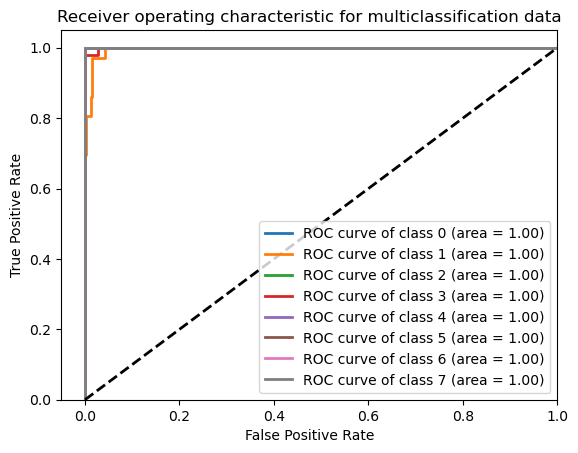

In [98]:
classifier = OneVsRestClassifier(rfc)
y_score = classifier.fit(xtrain, ytrain).predict_proba(xtest)

#Binarize the output
ytest_bin  = label_binarize(ytest, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(ytest_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [99]:
import joblib

joblib.dump(rfc, "primary_fuel.pkl")

a = np.array(ytest)
predicted = model.predict(xtest)

df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

Original  Predicted
0           4          4
1           0          0
2           5          5
3           4          4
4           7          7
..        ...        ...
368         6          6
369         5          5
370         2          2
371         3          3
372         7          7

[373 rows x 2 columns]

# Model 2

<b>Here, 'capacity_mw' is the target variable.</b>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
df2 = pd.read_csv('database_IND.csv')

df2

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [102]:
type(df2)

pandas.core.frame.DataFrame

In [103]:
df2.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [104]:
df2.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [105]:
df2.sample(3)

country country_long             name   gppd_idnr  capacity_mw  latitude  \
51      IND        India            BANER  IND0000028         12.0   32.1686   
367     IND        India             KOSI  IND0000212         20.0   26.4970   
71      IND        India  BELLAD-BAGEWADI  WRI1019907         15.0   16.2774   

     longitude primary_fuel other_fuel1 other_fuel2  ...  \
51     76.4695        Hydro         NaN         NaN  ...   
367    86.9549        Hydro         NaN         NaN  ...   
71     74.7111      Biomass         NaN         NaN  ...   

     year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
51                  2019.0                  NaN                 NaN   
367                 2019.0                  NaN                 NaN   
71                     NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
51                  NaN                 NaN                 NaN   
367                 NaN                 NaN                 NaN   
71                  NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  generation_data_source  \
51                   NaN                  NaN                     NaN   
367                  NaN                  NaN                     NaN   
71                   NaN                  NaN                     NaN   

     estimated_generation_gwh  
51                        NaN  
367                       NaN  
71                        NaN  

[3 rows x 27 columns]

In [106]:
df2.shape

(907, 27)

<b>The dataset consists of 907 rows and 27 columns.</b>

In [107]:
df2.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [109]:
# Let's check the number of unique values present in the dataset

df2.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

<b>As we can see, the columns 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019' and  'estimated_generation_gwh' do not contain any unique values. So, let's drop these 5 columns.</b>

In [110]:
df2.drop(columns=['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1, inplace=True)

In [111]:
df2

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                                source  \
0    ...  National Renewable Energy Laboratory   
1    ...                  Ultratech Cement ltd   
2    ...                                   CDM   
3    ...         Central Electricity Authority   
4    ...         Central Electricity Authority   
..   ...                                   ...   
902  ...         Central Electricity Authority   
903  ...   Karnataka Power Corporation Limited   
904  ...                                   CDM   
905  ...                    Hindustan Zinc ltd   
906  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

    generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                   NaN                  NaN          

<b> Now, we are left with 907 rows and 22 columns.</b>

<b>As we can see, the columns 'country', 'country_long', 'other_fuel2', 'year_of_capacity_data' and 'generation_data_source' have only a single unique value. This means, all the entries in these columns are the same. Thus, let's drop these 5 columns, as they serve no purpose in our analysis.</b>

In [112]:
df2.drop(columns=['country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source'], axis=1, inplace=True)

In [113]:
df2

name   gppd_idnr  capacity_mw  latitude  \
0                ACME Solar Tower  WRI1020239          2.5   28.1839   
1             ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663   
2        AES Saurashtra Windfarms  WRI1026669         39.2   21.9038   
3                     AGARTALA GT  IND0000001        135.0   23.8712   
4                    AKALTARA TPP  IND0000002       1800.0   21.9603   
..                            ...         ...          ...       ...   
902                  YERMARUS TPP  IND0000513       1600.0   16.2949   
903  Yelesandra Solar Power Plant  WRI1026222          3.0   12.8932   
904  Yelisirur wind power project  WRI1026776         25.5   15.2758   
905                   ZAWAR MINES  WRI1019901         80.0   24.3500   
906       iEnergy Theni Wind Farm  WRI1026761         16.5    9.9344   

     longitude primary_fuel other_fuel1  commissioning_year  \
0      73.2407        Solar         NaN              2011.0   
1      74.6090         Coal         NaN                 NaN   
2      69.3732         Wind         NaN                 NaN   
3      91.3602          Gas         NaN              2004.0   
4      82.4091         Coal         Oil              2015.0   
..         ...          ...         ...                 ...   
902    77.3568         Coal         Oil              2016.0   
903    78.1654        Solar         NaN                 NaN   
904    75.5811         Wind         NaN                 NaN   
905    73.7477         Coal         NaN                 NaN   
906    77.4768         Wind         NaN                 NaN   

                                   owner  \
0                            Solar Paces   
1                   Ultratech Cement ltd   
2                                    AES   
3                                    NaN   
4                                    NaN   
..                                   ...   
902                                  NaN   
903  Karnataka Power Corporation Limited   
904                                  NaN   
905                   Hindustan Zinc ltd   
906                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI     

<b> Now, we are left with 907 rows and 17 columns.</b>

<b>As we can see, the columns 'name' and 'gppd_idnr' have all unique values. So, let's drop these 2 columns as well.</b> 

In [114]:
df2.drop(columns=['name', 'gppd_idnr'], axis=1, inplace=True)

In [115]:
df2

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                                owner  \
0                2011.0                          Solar Paces   
1                   NaN                 Ultratech Cement ltd   
2                   NaN                                  AES   
3                2004.0                                  NaN   
4                2015.0                                  NaN   
..                  ...                                  ...   
902              2016.0                                  NaN   
903                 NaN  Karnataka Power Corporation Limited   
904                 NaN                                  NaN   
905                 NaN                   Hindustan Zinc ltd   
906                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.57

<b>Now, we are left with 907 rows and 15 columns.</b>

<b>The columns 'other_fuel1', 'owner' and 'url' serve no purpose in our analysis. So, let's drop these columns as well.</b>

In [116]:
df2.drop(columns=['other_fuel1', 'owner', 'url'], axis=1, inplace=True)

In [117]:
df2

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal                 NaN   
2           39.2   21.9038    69.3732         Wind                 NaN   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar                 NaN   
904         25.5   15.2758    75.5811         Wind                 NaN   
905         80.0   24.3500    73.7477         Coal                 NaN   
906         16.5    9.9344    77.4768         Wind                 NaN   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  
0                    NaN  
1                    NaN  
2                    NaN  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903                  NaN  
904                  NaN  
905                  NaN  
906                  NaN  

[907 rows x 12 columns]

<b>Now, we are left with 907 rows and 12 columns.</b>

In [118]:
df2.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

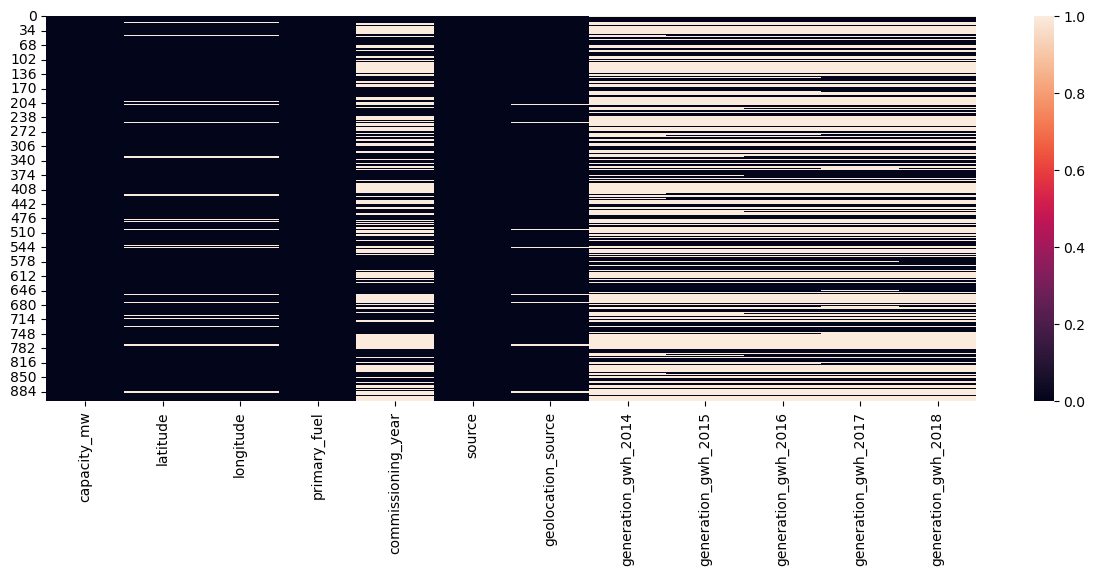

In [119]:
plt.figure(figsize=(15,5))

sns.heatmap(df2.isnull())

<b> From the heat map above, we can confirm that null values are present in the dataset.</b>

# Imputing null values

In [120]:
from sklearn.impute import SimpleImputer

SI = SimpleImputer()

In [121]:
# Let's impute the columns 'latitude' and 'longitude' using the mean

df2['latitude'] = SI.fit_transform(df2['latitude'].values.reshape(-1,1))
df2['longitude'] = SI.fit_transform(df2['longitude'].values.reshape(-1,1))

In [122]:
SI = SimpleImputer(strategy='median')

df2['generation_gwh_2014'] = SI.fit_transform(df2['generation_gwh_2014'].values.reshape(-1,1))
df2['generation_gwh_2015'] = SI.fit_transform(df2['generation_gwh_2015'].values.reshape(-1,1))
df2['generation_gwh_2016'] = SI.fit_transform(df2['generation_gwh_2016'].values.reshape(-1,1))
df2['generation_gwh_2017'] = SI.fit_transform(df2['generation_gwh_2017'].values.reshape(-1,1))
df2['generation_gwh_2018'] = SI.fit_transform(df2['generation_gwh_2018'].values.reshape(-1,1))

In [123]:
# Let's check the dataset again for any null values

df2.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [124]:
SI = SimpleImputer(strategy='most_frequent')

df2['commissioning_year'] = SI.fit_transform(df2['commissioning_year'].values.reshape(-1,1))
df2['geolocation_source'] = SI.fit_transform(df2['geolocation_source'].values.reshape(-1,1))

In [125]:
# Now, let's check the dataset again for any null values

df2.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

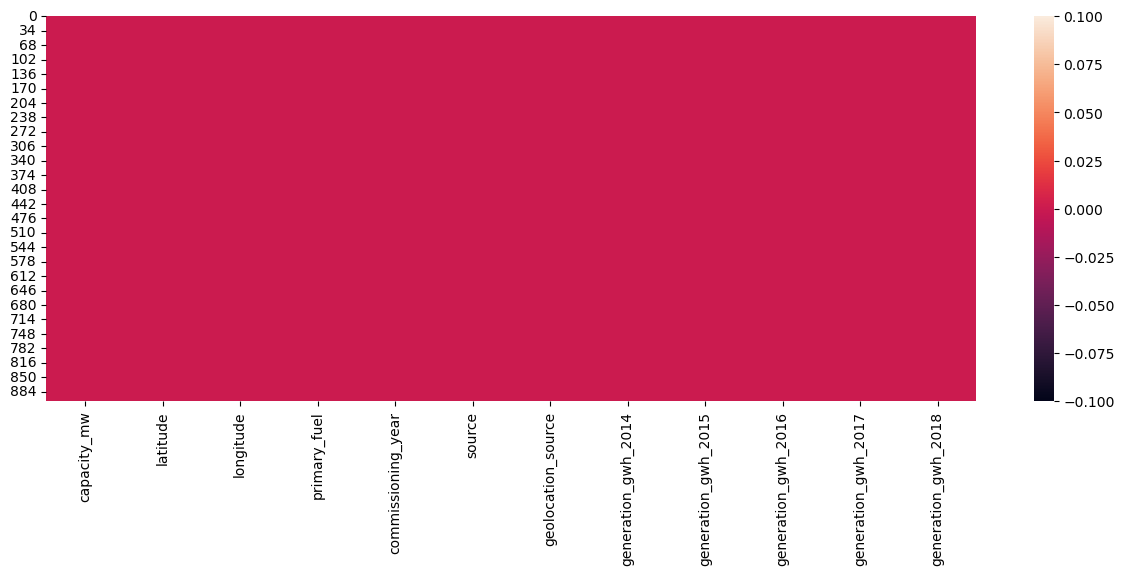

In [126]:
plt.figure(figsize=(15,5))

sns.heatmap(df2.isnull())

<b> As we can see, there are no null values present in our dataset.</b>

In [127]:
# Now, let's check the uniqueness of the target variable, i.e., 'primary_fuel'

df2['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [128]:
# Now, let's check the value count of the target variable, i.e., 'W'

df2['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [129]:
# Now, let's check whether the dataset contains any space

df2.loc[df2['capacity_mw']==" "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []

<b>As we can see, there is no space in the dataset.</b>

# Statistical Description of the Dataset

In [130]:
df2.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         2004.594267   
std     590.085456    6.079148    4.812291           15.734928   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2014.000000   
75%     385.250000   25.176450   79.206100         2015.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000

<b>This provides the statistical description of the data set.</b>
* As there are no negative / invalid values present in the dataset, we can say that the dataset appears perfect.
* There is very high standard deviation in all columns, except the columns 'latitude' and 'longitude'.
* There is a huge difference in mean and 2nd quantile of the column 'capacity_mw', which means that there are extreme outliers in this column.
* Mean and 2nd quantile of all the other columns are almost same.
* Mean of the column 'generation_gwh_2018' is high compared to other columns, which means the production is higher in 2018.</b>

<AxesSubplot:>

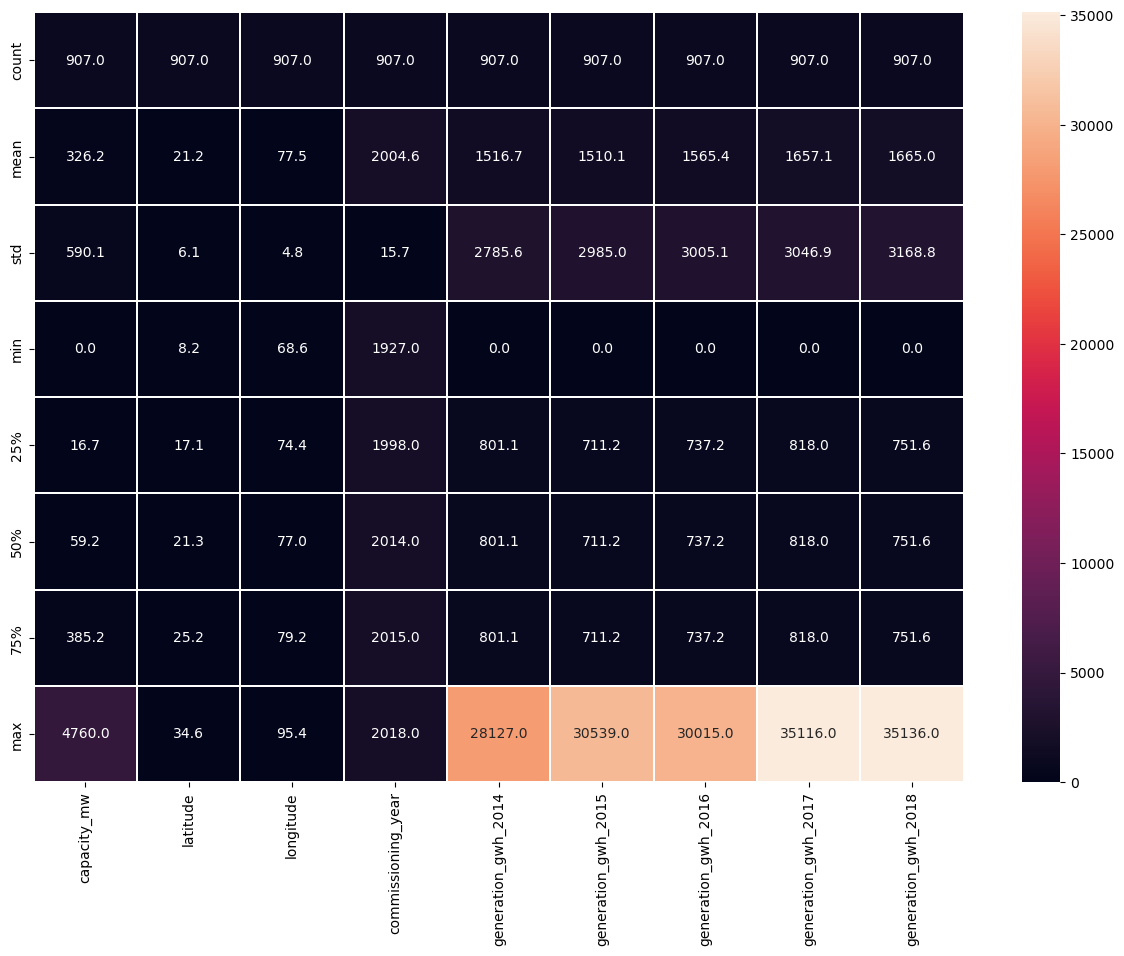

In [131]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,10))

sns.heatmap(df2.describe(), linewidths=0.1, fmt='0.1f', annot=True)

In [132]:
# Now, let's separate the categorical columns

categorical_columns = []

for i in df2.dtypes.index:
    if df2.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['primary_fuel', 'source', 'geolocation_source']


In [133]:
# Now, let's separate the numerical columns

numerical_columns = []

for i in df2.dtypes.index:
    if df2.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


# Data Visualization

# Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

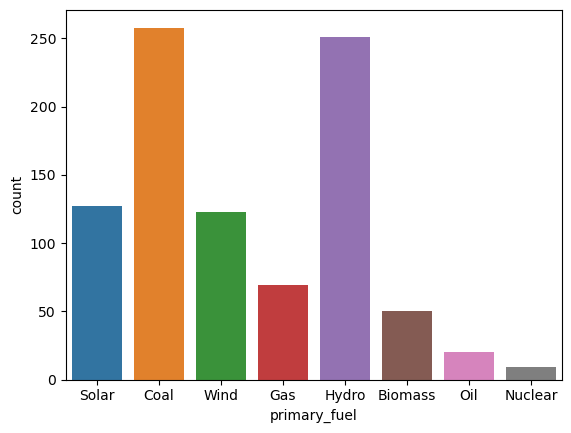

In [134]:
print(df2['primary_fuel'].value_counts())
sns.countplot(df2['primary_fuel'])

<b>As we can see, the primary fuel majorly used is Coal, followed by Hydro.</b>

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


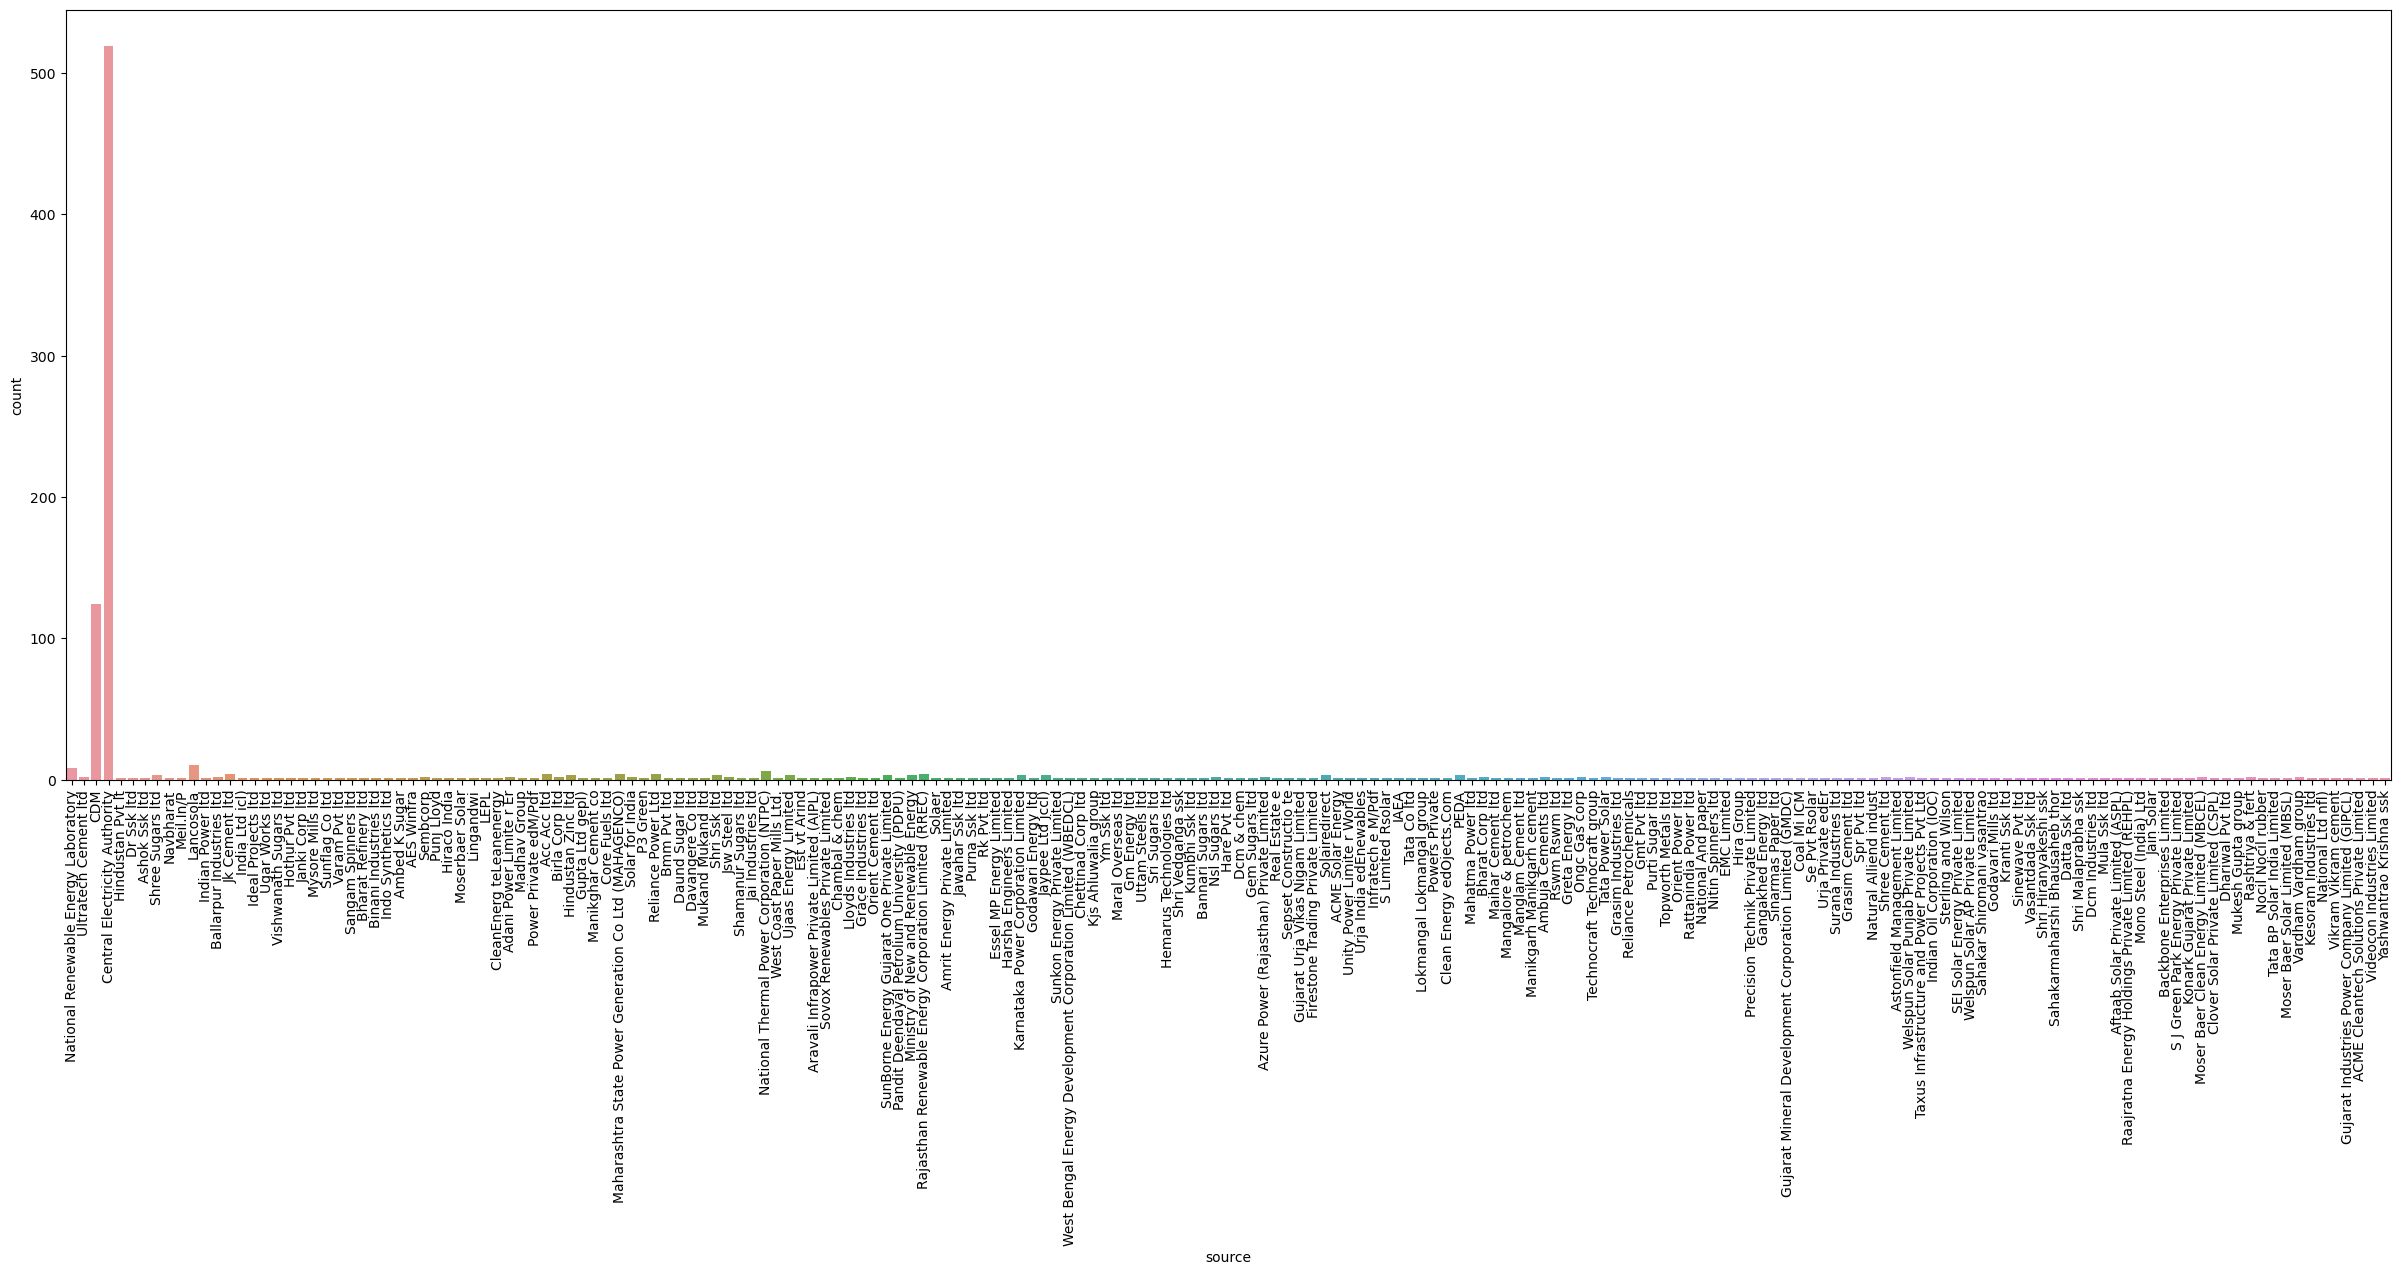

In [135]:
print(df2['source'].value_counts())
plt.figure(figsize=(30,10))
sns.countplot(df2['source'])
plt.xticks(rotation=90)
plt.show()

<b>As we can see, majority of the times, the source is Central Electricity Authority.</b>

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

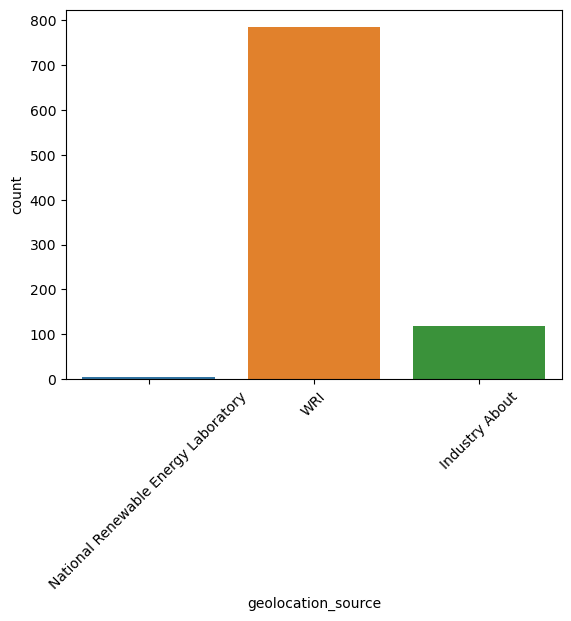

In [136]:
print(df2['geolocation_source'].value_counts())
plt.xticks(rotation = 45)
sns.countplot(df2['geolocation_source'])

<b>As we can see, majority of the times, the gelocation_source is WRI.</b>

# Checking the distribution of data for numerical columns

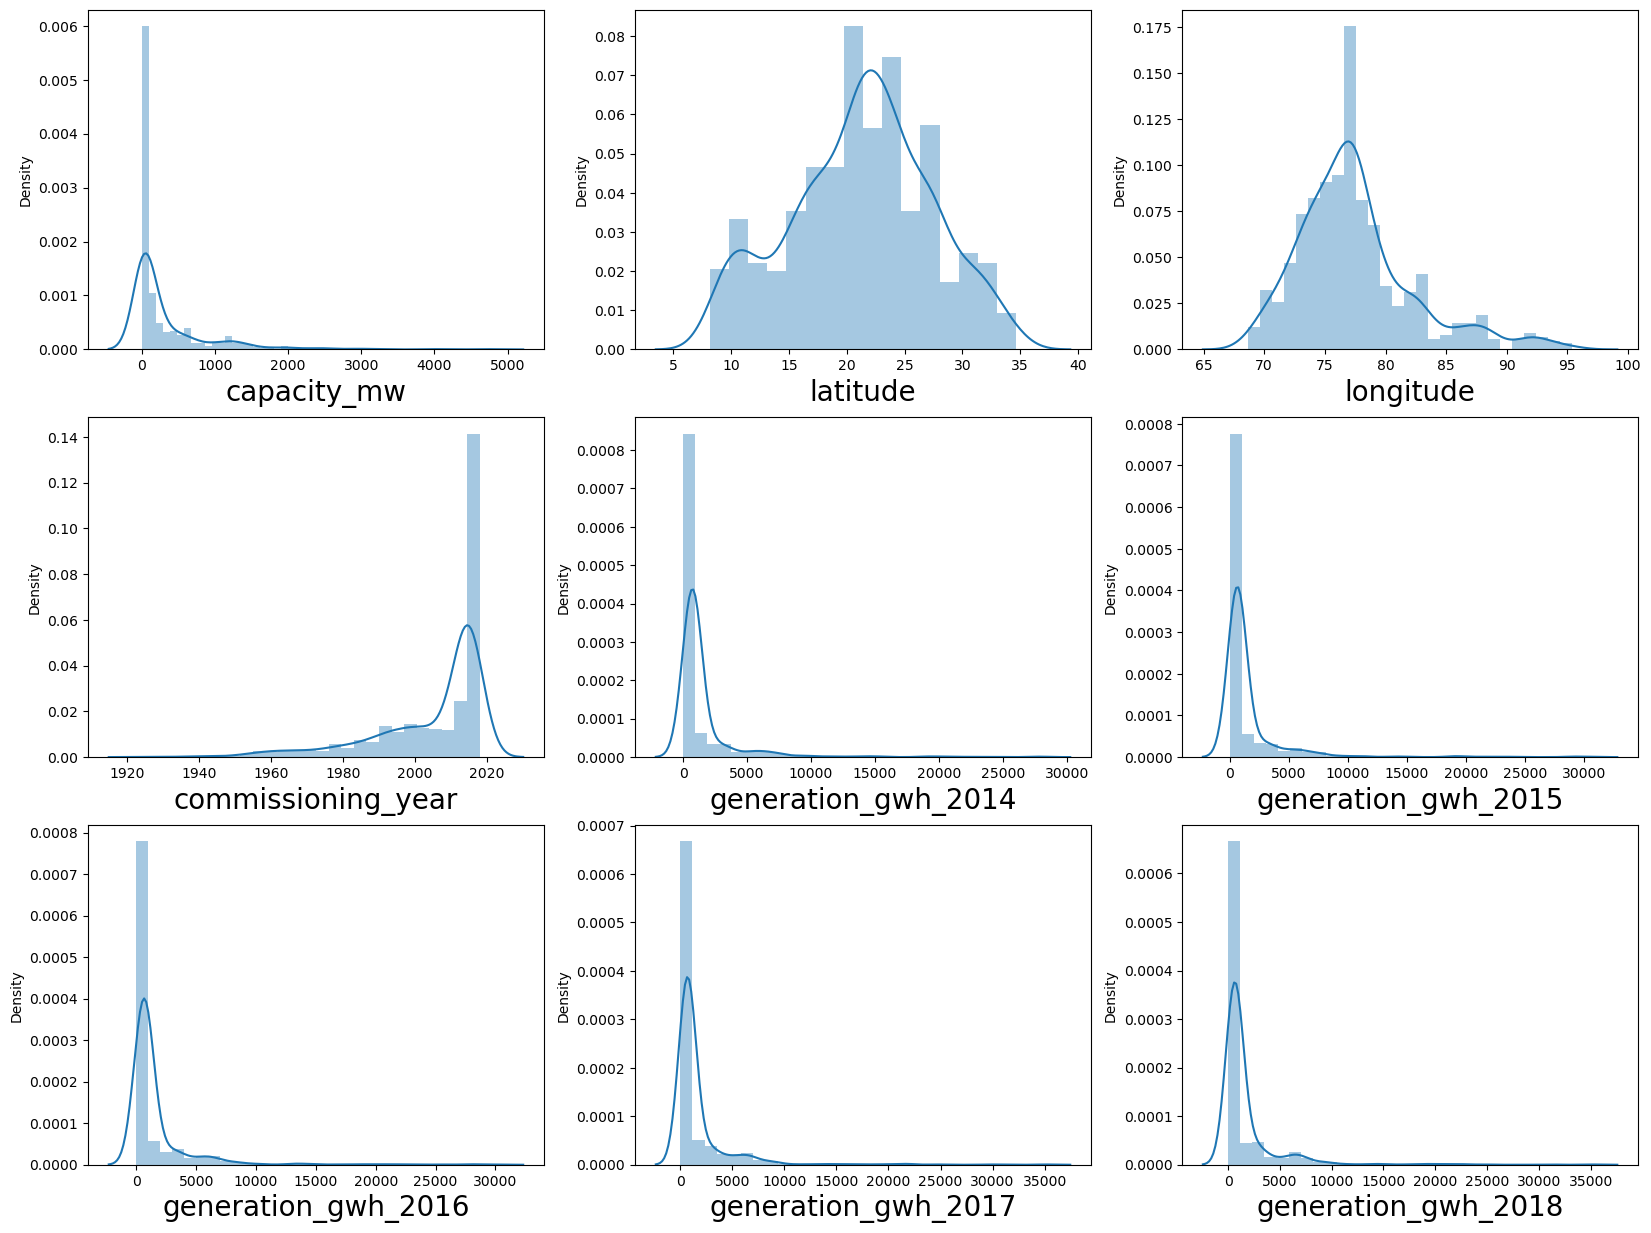

In [137]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

<b>From the distribution plot above, we can observe that skewness is present in all the columns.</b>.

# Bivariate Analysis

<AxesSubplot:title={'center':'Comparison between primary_fuel and capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

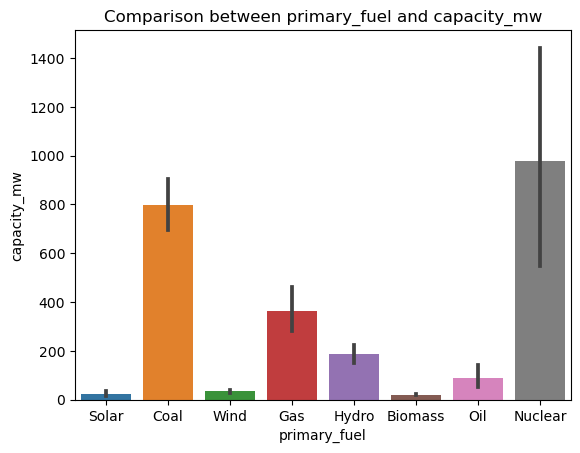

In [138]:
plt.title('Comparison between primary_fuel and capacity_mw')

x = df2['primary_fuel']
y = df2['capacity_mw']
sns.barplot(x,y)

<b>As we can see, Nuclear primary fuel has the highest capacity in megawatts, followed by Coal.</b>

<AxesSubplot:xlabel='capacity_mw', ylabel='source'>

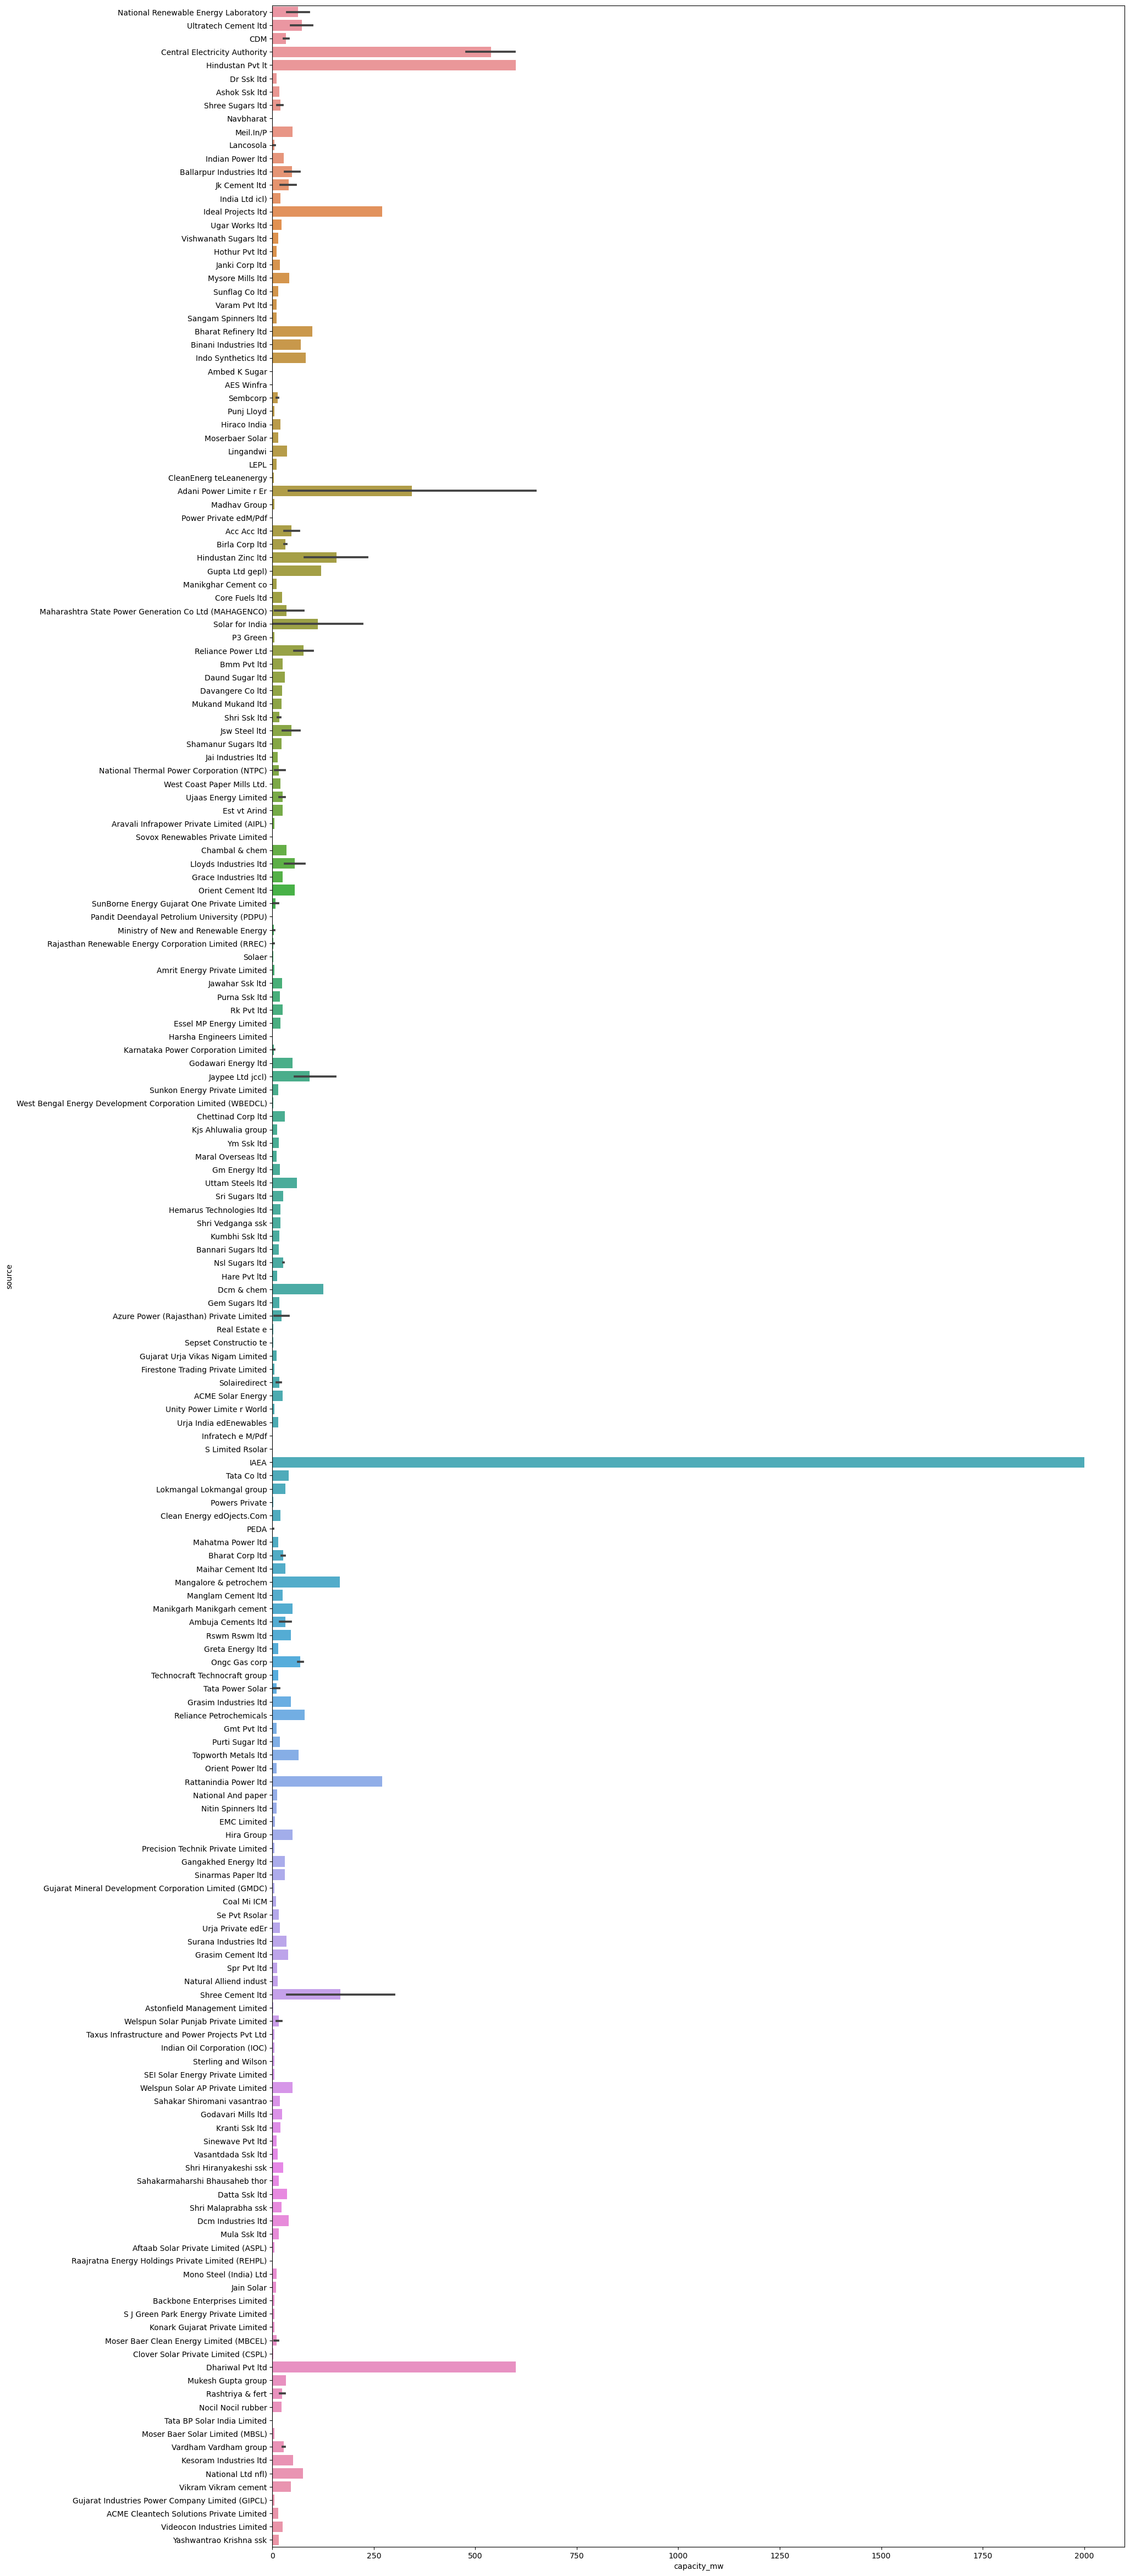

In [139]:
plt.figure(figsize=(20,60))
x = df2['source']
y = df2['capacity_mw']
sns.barplot(y='source', x='capacity_mw',data=df)

<b>As we can see, source IAEA has the highest electrical generating capacity in megawatts.</b>

<AxesSubplot:title={'center':'Comparison between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

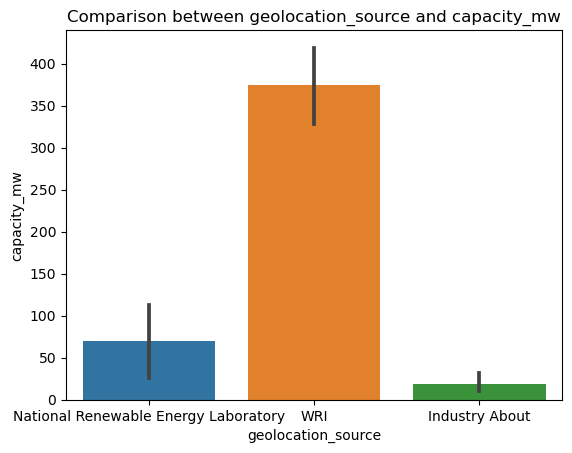

In [140]:
plt.title('Comparison between geolocation_source and capacity_mw')

x = df2['geolocation_source']
y = df2['capacity_mw']
sns.barplot(x,y)

<b>As we can see, geolocation_source WRI has the highest electrical generating capacity in megawatts.</b>

<AxesSubplot:title={'center':'Comparison between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

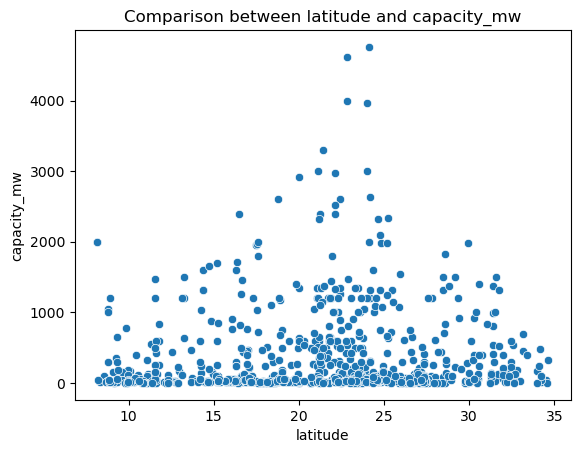

In [141]:
plt.title('Comparison between latitude and capacity_mw')

x = df2['latitude']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the latitude is in the range of 20-25.</b>

<AxesSubplot:title={'center':'Comparison between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

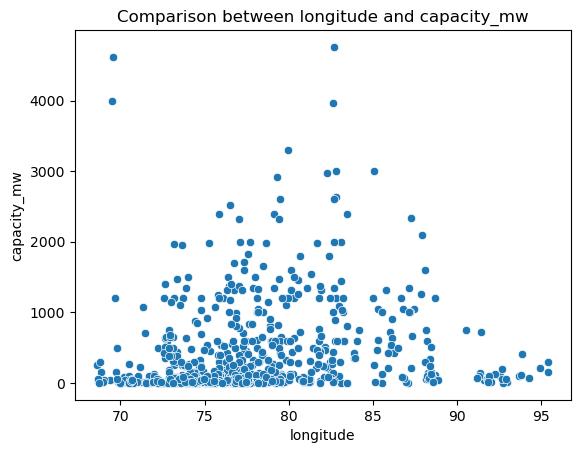

In [142]:
plt.title('Comparison between longitude and capacity_mw')

x = df2['longitude']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the longitude is in the range of 80-85.</b>

<AxesSubplot:title={'center':'Comparison between commissioning_year and capacity_mw'}, xlabel='commissioning_year', ylabel='capacity_mw'>

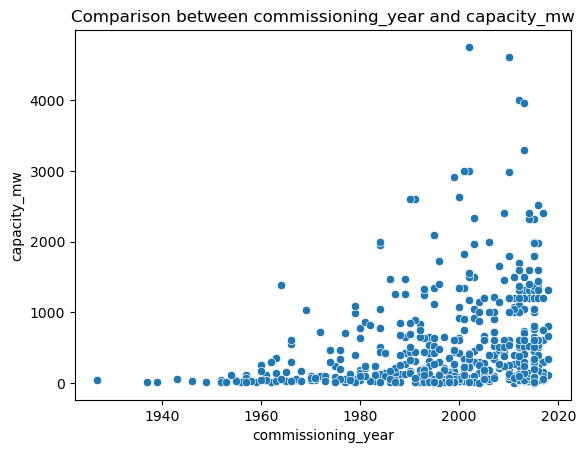

In [143]:
plt.title('Comparison between commissioning_year and capacity_mw')

x = df2['commissioning_year']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the commissioning year is in the range of 2000-2020.</b>

<AxesSubplot:title={'center':'Comparison between generation_gwh_2014 and capacity_mw'}, xlabel='generation_gwh_2014', ylabel='capacity_mw'>

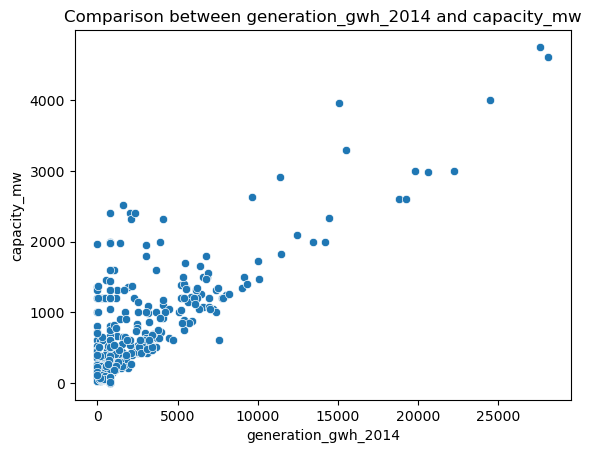

In [144]:
plt.title('Comparison between generation_gwh_2014 and capacity_mw')

x = df2['generation_gwh_2014']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the electricity generation is in the range of 20000-25000 units.</b>

<AxesSubplot:title={'center':'Comparison between generation_gwh_2015 and capacity_mw'}, xlabel='generation_gwh_2015', ylabel='capacity_mw'>

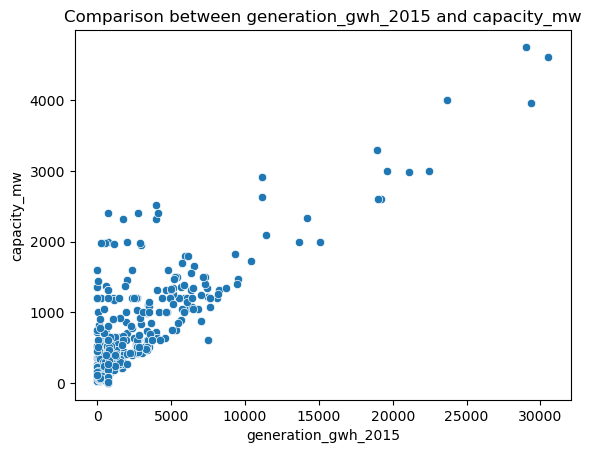

In [145]:
plt.title('Comparison between generation_gwh_2015 and capacity_mw')

x = df2['generation_gwh_2015']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the electricity generation is in the range of 20000-30000 units.</b>

<AxesSubplot:title={'center':'Comparison between generation_gwh_2016 and capacity_mw'}, xlabel='generation_gwh_2016', ylabel='capacity_mw'>

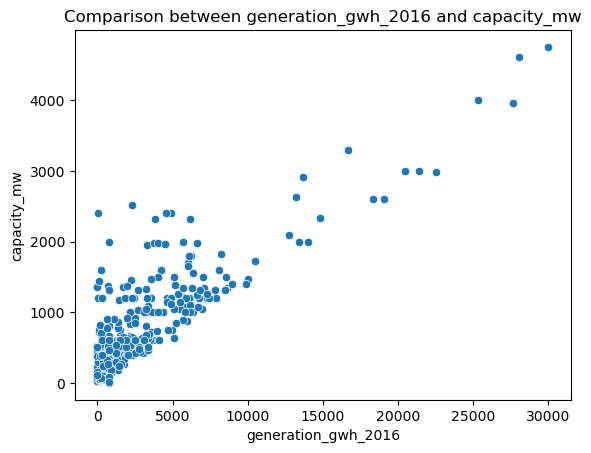

In [146]:
plt.title('Comparison between generation_gwh_2016 and capacity_mw')

x = df2['generation_gwh_2016']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the electricity generation is in the range of 20000-30000 units.</b>

<AxesSubplot:title={'center':'Comparison between generation_gwh_2017 and capacity_mw'}, xlabel='generation_gwh_2017', ylabel='capacity_mw'>

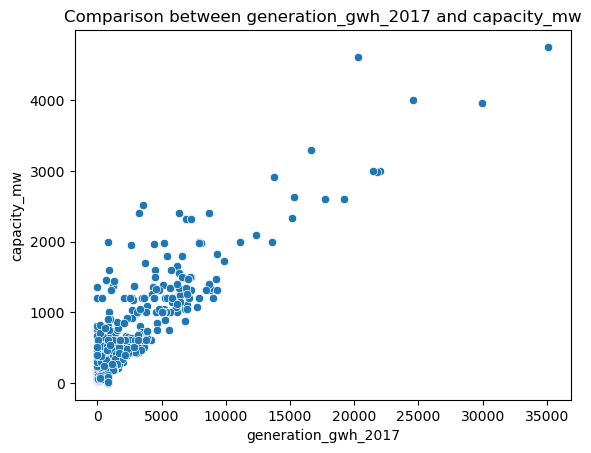

In [147]:
plt.title('Comparison between generation_gwh_2017 and capacity_mw')

x = df2['generation_gwh_2017']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the electricity generation is in the range of 20000-30000 units.</b>

<AxesSubplot:title={'center':'Comparison between generation_gwh_2018 and capacity_mw'}, xlabel='generation_gwh_2018', ylabel='capacity_mw'>

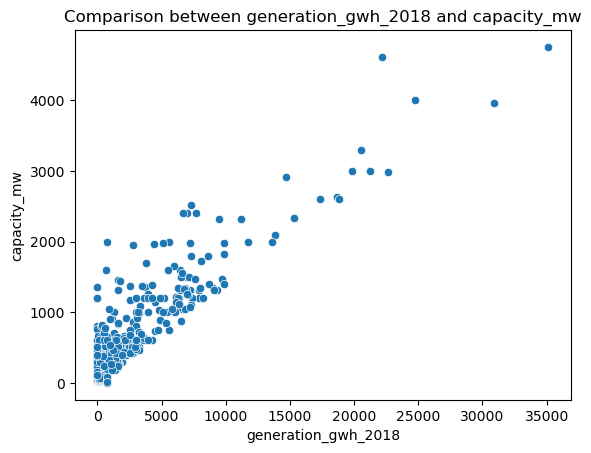

In [148]:
plt.title('Comparison between generation_gwh_2018 and capacity_mw')

x = df2['generation_gwh_2018']
y = df2['capacity_mw']
sns.scatterplot(x,y)

<b>As we can see, the electrical generating capacity in megawatts is higher when the electricity generation is in the range of 20000-35000 units.</b>

# Multivariate Analysis

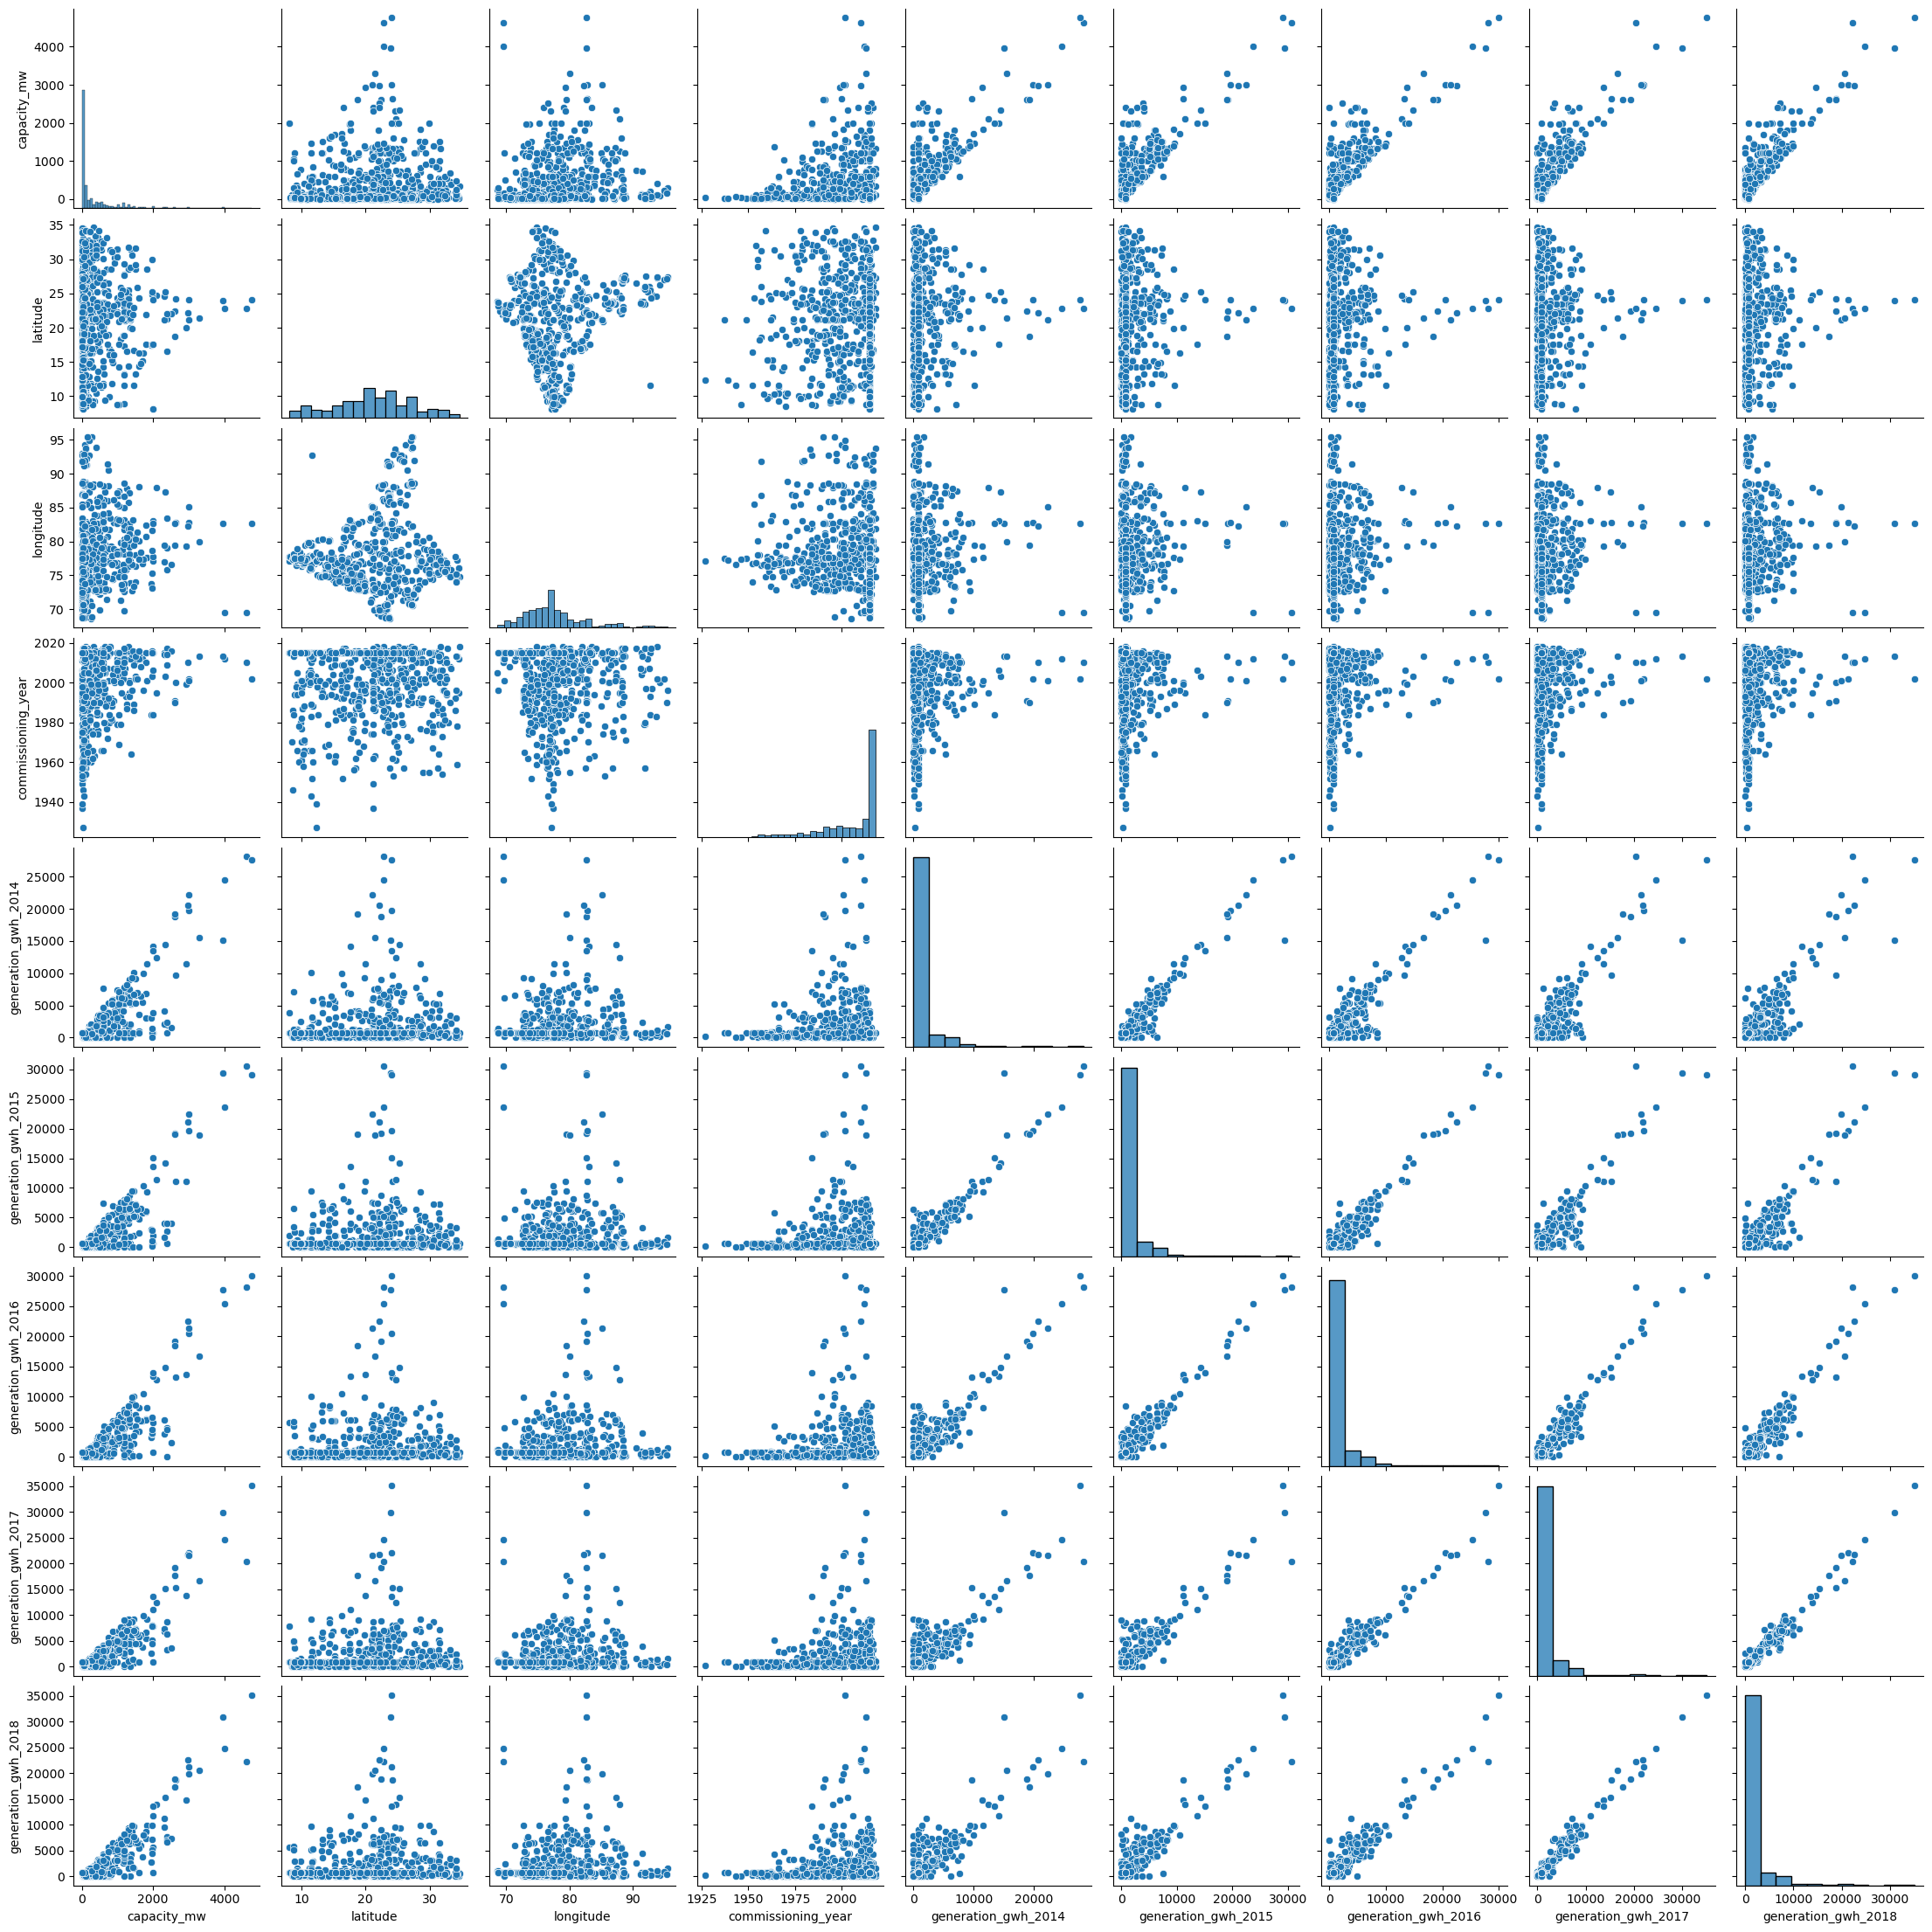

In [149]:
sns.pairplot(df2)

# Outliers Detection

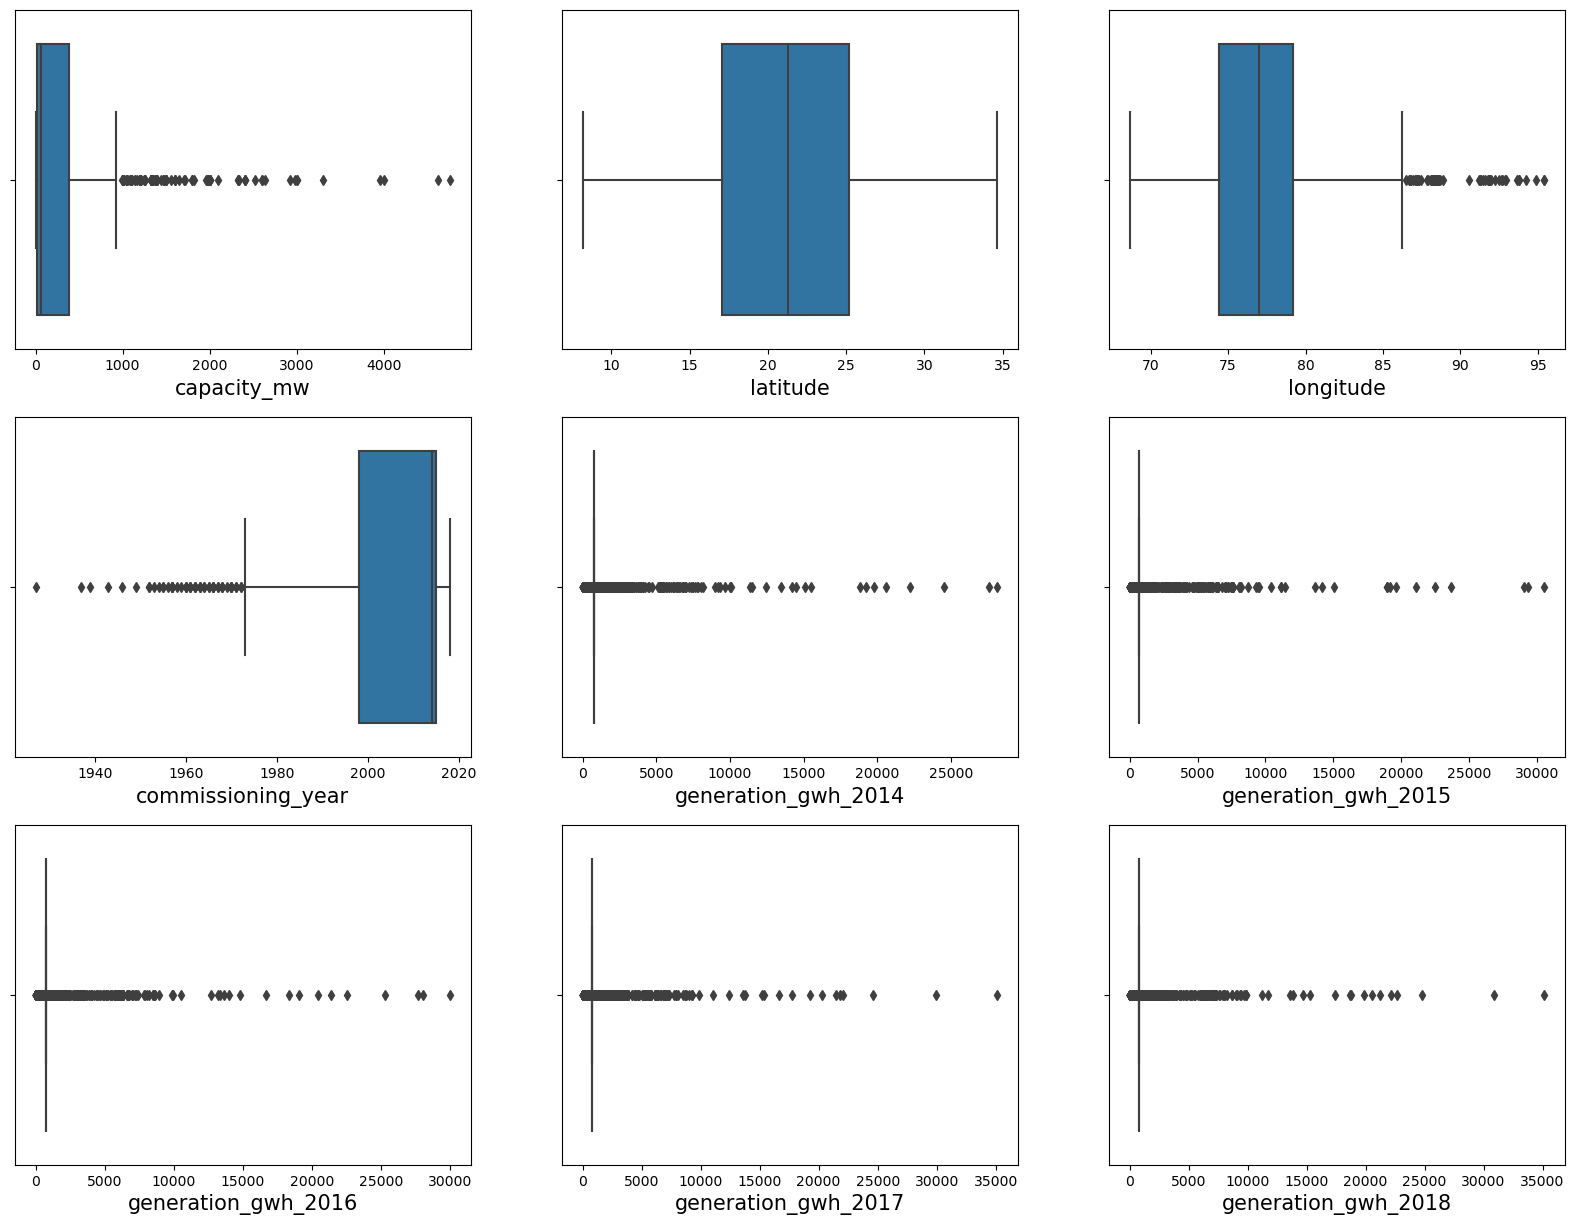

In [150]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

<b>As we can see, outliers are present in all the columns, except the column 'latitude'</b>

In [151]:
features = df2[['capacity_mw', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

from scipy.stats import zscore

z = np.abs(zscore(features))

In [152]:
# Now, let's create a new dataframe

df2_new = df2[(z<3).all(axis=1)]
df2_new

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2015.0   
2           39.2   21.9038    69.3732         Wind              2015.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2015.0   
904         25.5   15.2758    75.5811         Wind              2015.0   
905         80.0   24.3500    73.7477         Coal              2015.0   
906         16.5    9.9344    77.4768         Wind              2015.0   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[848 rows x 12 columns]

In [153]:
print(df2.shape) 
print(df2_new.shape) 

(907, 12)
(848, 12)


# Percentage data loss

In [154]:
loss_percent = (907-848)/907*100
print(loss_percent, '%')

6.504961411245866 %


In [155]:
df2_new.shape

(848, 12)

# Checking for Skewness

In [156]:
df2_new.skew().sort_values()

commissioning_year    -1.540498
latitude              -0.113225
longitude              0.924298
capacity_mw            1.996260
generation_gwh_2017    2.601457
generation_gwh_2018    2.667010
generation_gwh_2016    2.702771
generation_gwh_2015    2.764042
generation_gwh_2014    2.964626
dtype: float64

<b>As all the columns do not lie in the range of +/-0.5, thus we can conclude that skewness is present in all the columns.</b>

# Removing Skewness using yeo-johnson method

In [157]:
skewed_features = ['commissioning_year', 'longitude', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2014', 'capacity_mw']

In [158]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [159]:
df2_new[skewed_features] = scaler.fit_transform(df2_new[skewed_features].values)
df2_new[skewed_features].head()

commissioning_year  longitude  generation_gwh_2017  generation_gwh_2018  \
0            0.307512  -0.926786            -0.024077            -0.045715   
1            0.717618  -0.507777            -0.024077            -0.045715   
2            0.717618  -2.364043            -0.024077            -0.045715   
3           -0.325950   2.440084            -0.190297            -0.184852   
4            0.717618   1.254470             2.022370             2.413626   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2014  capacity_mw  
0            -0.040243            -0.039172            -0.036828    -1.677680  
1            -0.040243            -0.039172            -0.036828     0.234081  
2            -0.040243            -0.039172            -0.036828    -0.264685  
3             0.103243             0.113738            -0.261849     0.406960  
4             2.304422             2.302804             1.434001     1.760169

In [160]:
# Now, let's check the skewness again after applying yeo-johnson method

df2_new.skew()

capacity_mw            0.015749
latitude              -0.113225
longitude              0.000123
commissioning_year    -1.104914
generation_gwh_2014    0.234635
generation_gwh_2015    0.168709
generation_gwh_2016    0.153749
generation_gwh_2017    0.131077
generation_gwh_2018    0.137150
dtype: float64

<b>We can see that the skewness has been removed.</b>

<b>Now, let's visualize the data using distplot.<b>

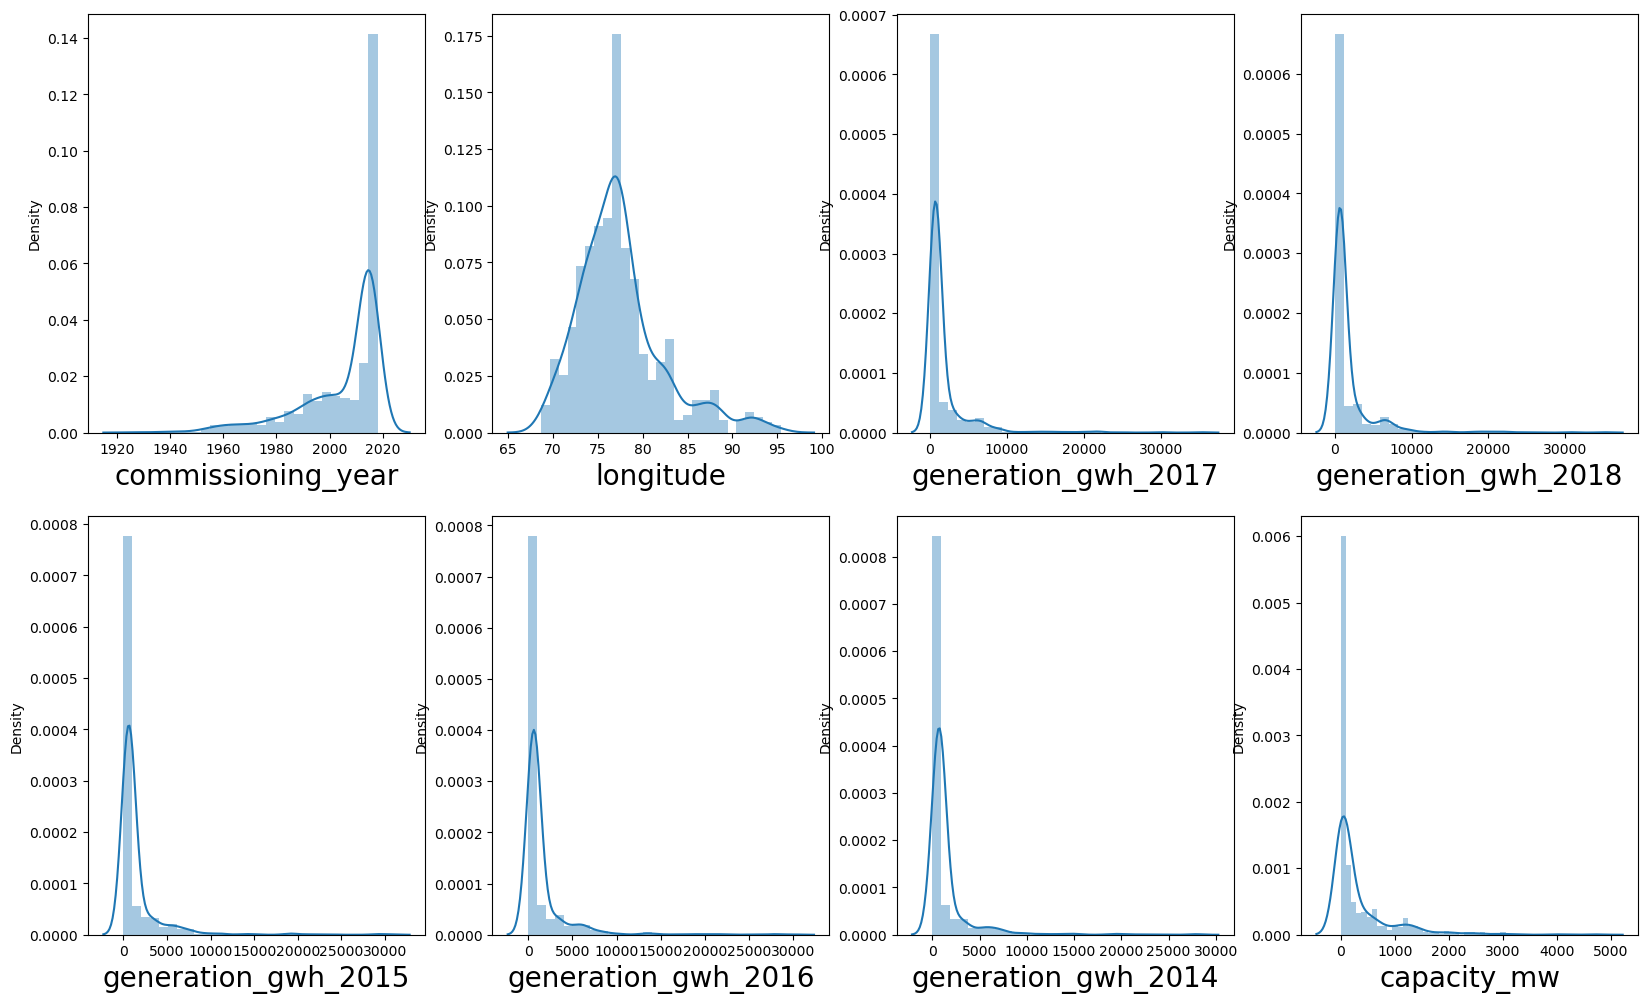

In [161]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df2_new[skewed_features]:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Encoding the categorical columns using Label Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df2_new[categorical_columns] = df2_new[categorical_columns].apply(LE.fit_transform)
df2_new[categorical_columns]

primary_fuel  source  geolocation_source
0               6     109                   1
1               1     174                   2
2               7      21                   2
3               2      22                   2
4               1      22                   2
..            ...     ...                 ...
902             1      22                   2
903             6      77                   0
904             7      21                   2
905             1      59                   2
906             7      21                   2

[848 rows x 3 columns]

# Correlation between features and labels

In [163]:
df2_new.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.053846   0.336388     -0.522043   
latitude                0.053846  1.000000  -0.070520     -0.002418   
longitude               0.336388 -0.070520   1.000000     -0.405746   
primary_fuel           -0.522043 -0.002418  -0.405746      1.000000   
commissioning_year     -0.239916  0.027967  -0.180006      0.207762   
source                 -0.395962  0.069056  -0.241429      0.035891   
geolocation_source      0.477413 -0.202483   0.300815     -0.477847   
generation_gwh_2014     0.307301  0.107148   0.030219     -0.134392   
generation_gwh_2015     0.323980  0.101429   0.029606     -0.149812   
generation_gwh_2016     0.351536  0.119343   0.084960     -0.169248   
generation_gwh_2017     0.335235  0.103048   0.072753     -0.149800   
generation_gwh_2018     0.344624  0.110917   0.095729     -0.162296   

                     commissioning_year    source  geolocation_source  \
capacity_mw                   -0.239916 -0.395962            0.477413   
latitude                       0.027967  0.069056           -0.202483   
longitude                     -0.180006 -0.241429            0.300815   
primary_fuel                   0.207762  0.035891           -0.477847   
commissioning_year             1.000000  0.362179           -0.291186   
source                         0.362179  1.000000           -0.497535   
geolocation_source            -0.291186 -0.497535            1.000000   
generation_gwh_2014            0.012809 -0.018743            0.015025   
generation_gwh_2015            0.058275 -0.020481            0.016418   
generation_gwh_2016            0.128042 -0.019936            0.015982   
generation_gwh_2017            0.115113 -0.012254            0.009823   
generation_gwh_2018            0.104701 -0.023266            0.018651   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.307301             0.323980   
latitude                        0.107148             0.101429   
longitude                       0.030219             0.029606   
primary_fuel                   -0.134392            -0.149812   
commissioning_year              0.012809             0.058275   
source                         -0.018743            -0.020481   
geolocation_source              0.015025             0.016418   
generation_gwh_2014             1.000000             0.839747   
generation_gwh_2015             0.839747             1.000000   
generation_gwh_2016             0.783935             0.881666   
generation_gwh_2017             0.712494             0.770610   
generation_gwh_2018             0.717077             0.771435   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.351536             0.335235   
latitude                        0.119343             0.103048   
longitude                       0.084960             0.072753   
primary_fuel                   -0.169248            -0.149800   
commissioning_year              0.128042             0.115113   
source                         -0.019936            -0.012254   
geolocation_source              0.015982             0.009823   
generation_gwh_2014             0.783935             0.712494   
generation_gwh_2015             0.881666             0.770610   
generation_gwh_2016             1.000000             0.900782   
generation_gwh_2017             0.900782             1.000000   
generation_gwh_2018             0.895394             0.935870   

                     generation_gwh_2018  
capacity_mw                     0.344624  
latitude                        0.110917  
longitude                       0.095729  
primary_fuel                   -0.162296  
commissioning_year              0.104701  
source                         -0.023266  
geolocation_source              0.018651  
generation_gwh_2014             0.717077  
generation_gwh_2015             0.771435  
generation_gwh_2016      

# Correlation between features and labels using Heatmap

<AxesSubplot:>

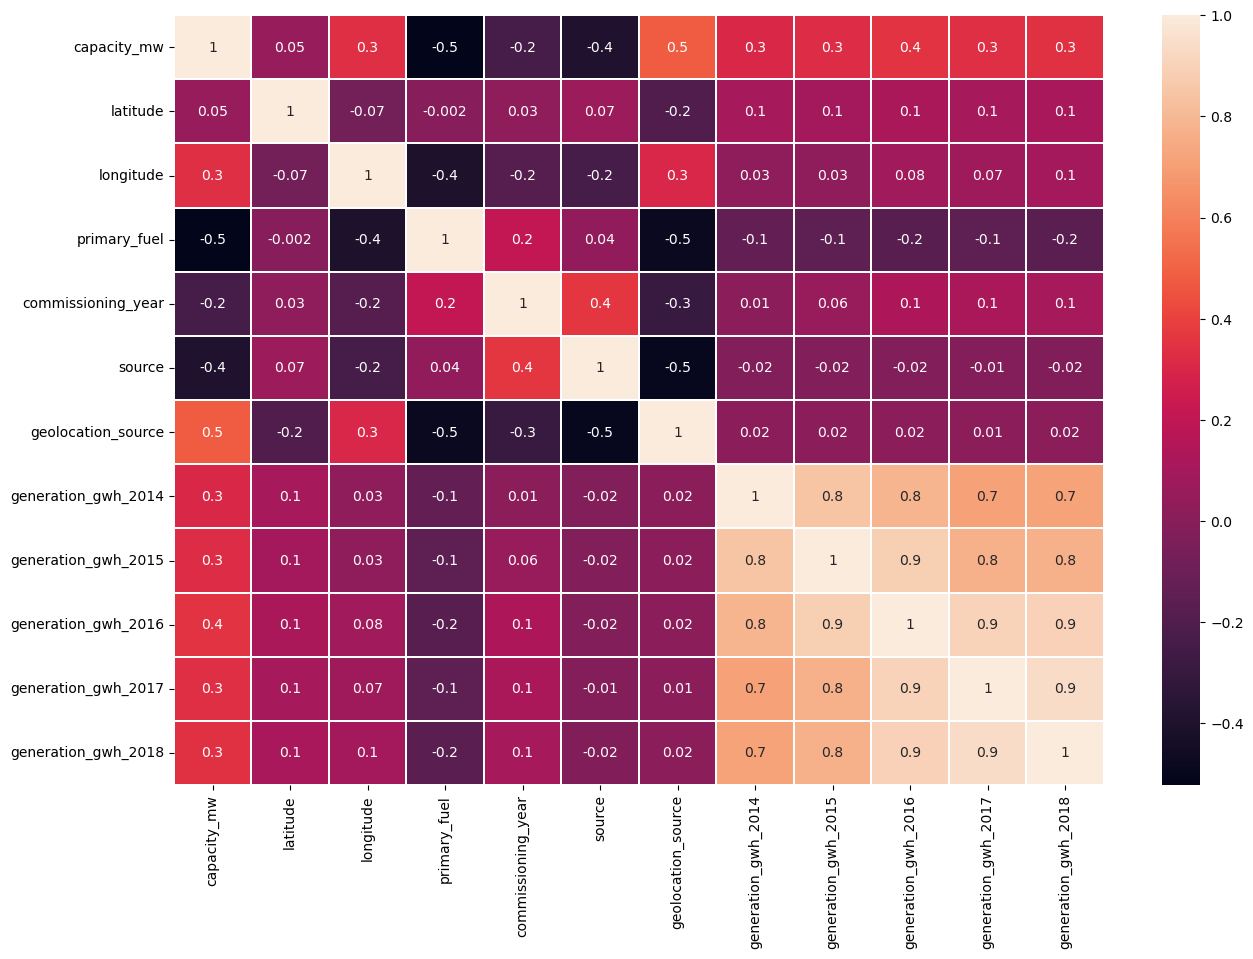

In [164]:
plt.figure(figsize=(15, 10))

sns.heatmap(df2_new.corr(), linewidths=0.1, fmt='.1g', annot = True)

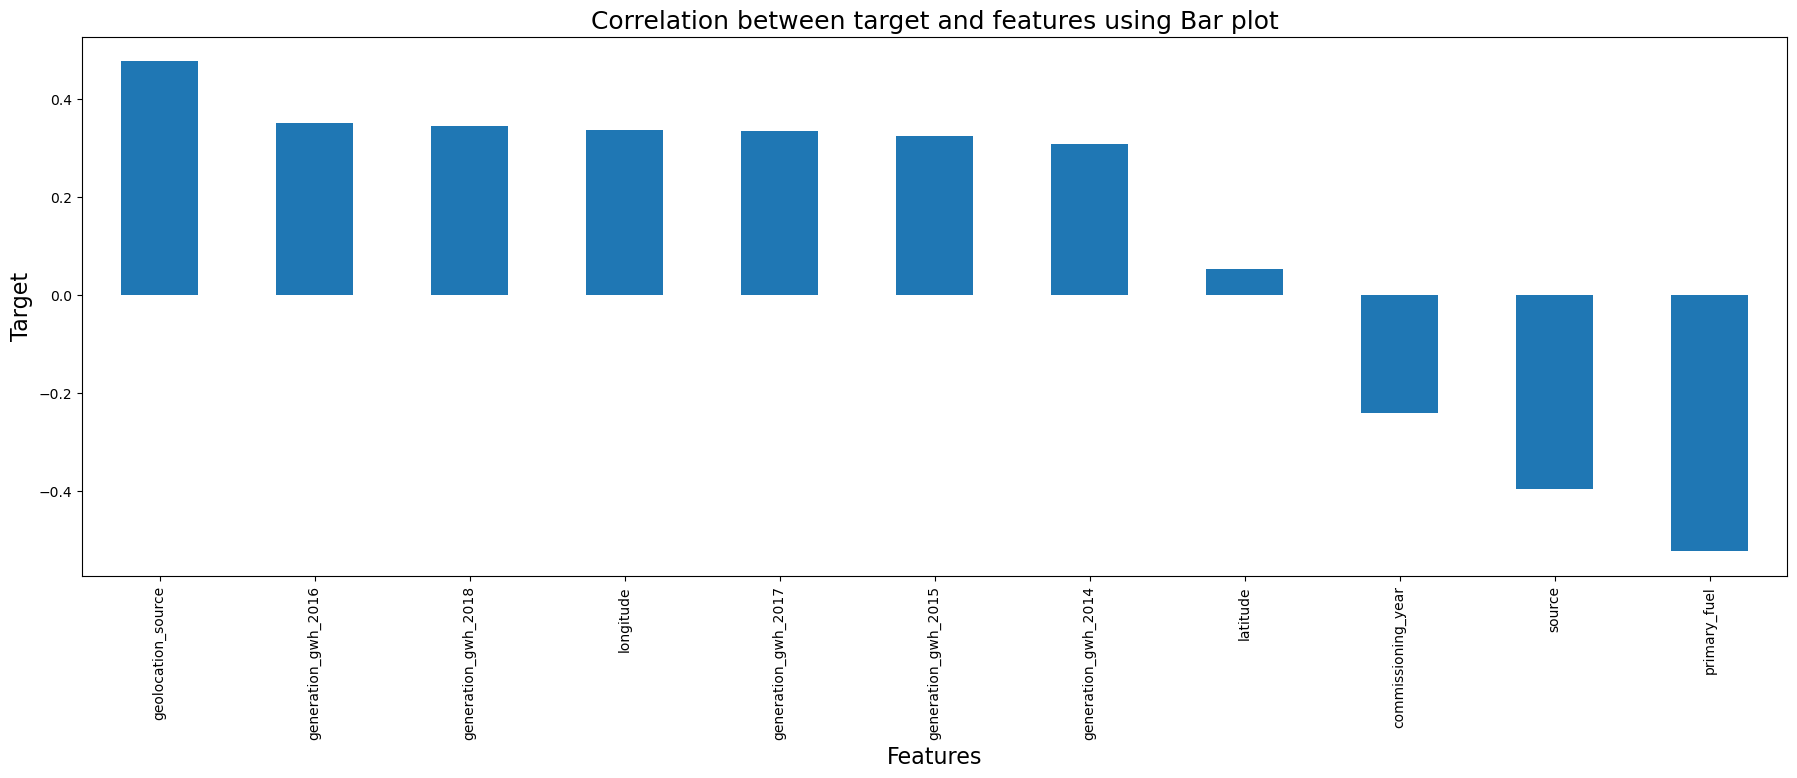

In [165]:
plt.figure(figsize=(22,7))
df2_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

In [166]:
# Now, let's drop the column 'latitude'

df2_new.drop(('latitude'),axis=1, inplace=True)

df2_new.head()

capacity_mw  longitude  primary_fuel  commissioning_year  source  \
0    -1.677680  -0.926786             6            0.307512     109   
1     0.234081  -0.507777             1            0.717618     174   
2    -0.264685  -2.364043             7            0.717618      21   
3     0.406960   2.440084             2           -0.325950      22   
4     1.760169   1.254470             1            0.717618      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1            -0.036828            -0.040243   
1                   2            -0.036828            -0.040243   
2                   2            -0.036828            -0.040243   
3                   2            -0.261849             0.103243   
4                   2             1.434001             2.304422   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            -0.039172            -0.024077            -0.045715  
1            -0.039172            -0.024077            -0.045715  
2            -0.039172            -0.024077            -0.045715  
3             0.113738            -0.190297            -0.184852  
4             2.302804             2.022370             2.413626

In [167]:
df2_new.shape

(848, 11)

<b>By checking out the shape of the dataset, we can confirm that the columns 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018' have been deleted.</b>

# Seperating dependent and independent variables

In [168]:
x = df2_new.drop('capacity_mw', axis=1)

y = df2_new['capacity_mw']

In [169]:
x.shape

(848, 10)

In [170]:
y.shape

(848,)

# Data Standardization using Standard Scaler

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

longitude  primary_fuel  commissioning_year    source  \
0    -0.926786      1.171241            0.307512  1.394327   
1    -0.507777     -0.982298            0.717618  2.816310   
2    -2.364042      1.601948            0.717618 -0.530818   
3     2.440084     -0.551590           -0.325950 -0.508942   
4     1.254470     -0.982298            0.717618 -0.508942   
..         ...           ...                 ...       ...   
843   0.221238     -0.982298            0.826118 -0.508942   
844   0.410817      1.171241            0.717618  0.694274   
845  -0.233813      1.601948            0.717618 -0.530818   
846  -0.766739     -0.982298            0.717618  0.300494   
847   0.250035      1.601948            0.717618 -0.530818   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.033559            -0.036828            -0.040243   
1              0.407984            -0.036828            -0.040243   
2              0.407984            -0.036828            -0.040243   
3              0.407984            -0.261849             0.103243   
4              0.407984             1.434001             2.304422   
..                  ...                  ...                  ...   
843            0.407984            -0.036828            -2.463004   
844           -2.475103            -0.036828            -0.040243   
845            0.407984            -0.036828            -0.040243   
846            0.407984            -0.036828            -0.040243   
847            0.407984            -0.036828            -0.040243   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0              -0.039172            -0.024077            -0.045715  
1              -0.039172            -0.024077            -0.045715  
2              -0.039172            -0.024077            -0.045715  
3               0.113738            -0.190297            -0.184852  
4               2.302804             2.022370             2.413626  
..                   ...                  ...                  ...  
843            -0.840762             0.022495            -0.115690  
844            -0.039172            -0.024077            -0.045715  
845            -0.039172            -0.024077            -0.045715  
846            -0.039172            -0.024077            -0.045715  
847            -0.039172            -0.024077            -0.045715  

[848 rows x 10 columns]

In [172]:
vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values             Features
0    1.297817            longitude
1    1.703928         primary_fuel
2    1.284356   commissioning_year
3    1.652054               source
4    1.868681   geolocation_source
5    3.581639  generation_gwh_2014
6    6.263824  generation_gwh_2015
7   10.901315  generation_gwh_2016
8    9.694815  generation_gwh_2017
9    9.214704  generation_gwh_2018

<b>The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values             Features
0    1.297817            longitude
1    1.703928         primary_fuel
2    1.284356   commissioning_year
3    1.652054               source
4    1.868681   geolocation_source
5    3.581639  generation_gwh_2014
6    6.263824  generation_gwh_2015
7   10.901315  generation_gwh_2016
8    9.694815  generation_gwh_2017
9    9.214704  generation_gwh_2018

<b>As the column 'generation_gwh_2016' has vif greater than 10, let's drop this column as well.</b>

In [174]:
x.drop(columns=['generation_gwh_2016'], axis=1, inplace=True)

In [175]:
x

longitude  primary_fuel  commissioning_year    source  \
0    -0.926786      1.171241            0.307512  1.394327   
1    -0.507777     -0.982298            0.717618  2.816310   
2    -2.364042      1.601948            0.717618 -0.530818   
3     2.440084     -0.551590           -0.325950 -0.508942   
4     1.254470     -0.982298            0.717618 -0.508942   
..         ...           ...                 ...       ...   
843   0.221238     -0.982298            0.826118 -0.508942   
844   0.410817      1.171241            0.717618  0.694274   
845  -0.233813      1.601948            0.717618 -0.530818   
846  -0.766739     -0.982298            0.717618  0.300494   
847   0.250035      1.601948            0.717618 -0.530818   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.033559            -0.036828            -0.040243   
1              0.407984            -0.036828            -0.040243   
2              0.407984            -0.036828            -0.040243   
3              0.407984            -0.261849             0.103243   
4              0.407984             1.434001             2.304422   
..                  ...                  ...                  ...   
843            0.407984            -0.036828            -2.463004   
844           -2.475103            -0.036828            -0.040243   
845            0.407984            -0.036828            -0.040243   
846            0.407984            -0.036828            -0.040243   
847            0.407984            -0.036828            -0.040243   

     generation_gwh_2017  generation_gwh_2018  
0              -0.024077            -0.045715  
1              -0.024077            -0.045715  
2              -0.024077            -0.045715  
3              -0.190297            -0.184852  
4               2.022370             2.413626  
..                   ...                  ...  
843             0.022495            -0.115690  
844            -0.024077            -0.045715  
845            -0.024077            -0.045715  
846            -0.024077            -0.045715  
847            -0.024077            -0.045715  

[848 rows x 9 columns]

<b>As we can see, the vif value of all the columns is less than 10. Hence, we can conclude that the multicollinearity problem has been solved.</b>

# Finding best random state

In [176]:
from sklearn.tree import DecisionTreeRegressor

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7778811439646462 on Random_state  172


# Train Test Split

In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=172)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [179]:
Regressors = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

In [180]:
for i in Regressors:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} has training score of {training_score.mean()*100}% and  mean squared error of {round(error, 2)}')

Model LinearRegression() has training score of 45.55057682674921% and  mean squared error of 0.5
Model Ridge() has training score of 45.57087921372631% and  mean squared error of 0.5
Model Lasso() has training score of -0.5342459644767716% and  mean squared error of 1.13
Model ElasticNet() has training score of 0.5591584100794744% and  mean squared error of 1.12
Model SVR() has training score of 66.76799370424465% and  mean squared error of 0.25
Model KNeighborsRegressor() has training score of 67.31008687175472% and  mean squared error of 0.23
Model DecisionTreeRegressor() has training score of 65.28711451844273% and  mean squared error of 0.26
Model RandomForestRegressor() has training score of 76.96699098795754% and  mean squared error of 0.16


<b>As we can see, the best model is Random Forest Regressor.</b>

In [181]:
# Random Forest Regressor

param_grid = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [182]:
GCV = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)

In [183]:
GCV.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [184]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [185]:
rfr = RandomForestRegressor(criterion='mse', max_depth=8, max_features= 'sqrt', n_estimators= 700)

In [186]:
rfr .fit(xtrain, ytrain)
pred = rfr .predict(xtest)
print(r2_score(ytest, pred)*100)

86.16740921629


# Let's boost the model with Gradient Boosting

In [187]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()

gdr.fit(xtrain, ytrain)
ypred = gdr.predict(xtrain)

from sklearn import metrics
print('r2 score', metrics.r2_score(ytrain, ypred))

r2 score 0.8740071519056642


<b>After boosting the model with Gradient Boosting, our r2 score increased to 87.40%.</b>

# Saving the model

In [188]:
import joblib
joblib.dump(mod,"capacity_mw.pkl")

['capacity_mw.pkl']

# Loading the model

In [189]:
a = np.array(ytest)
predicted = model.predict(xtest)

df2_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df2_final

Original  Predicted
0   -1.597976          6
1   -0.005835          4
2    1.624991          4
3    1.578988          4
4    1.046551          1
..        ...        ...
165 -0.579790          0
166  1.554073          5
167  1.684417          4
168  0.406960          4
169  1.101671          3

[170 rows x 2 columns]

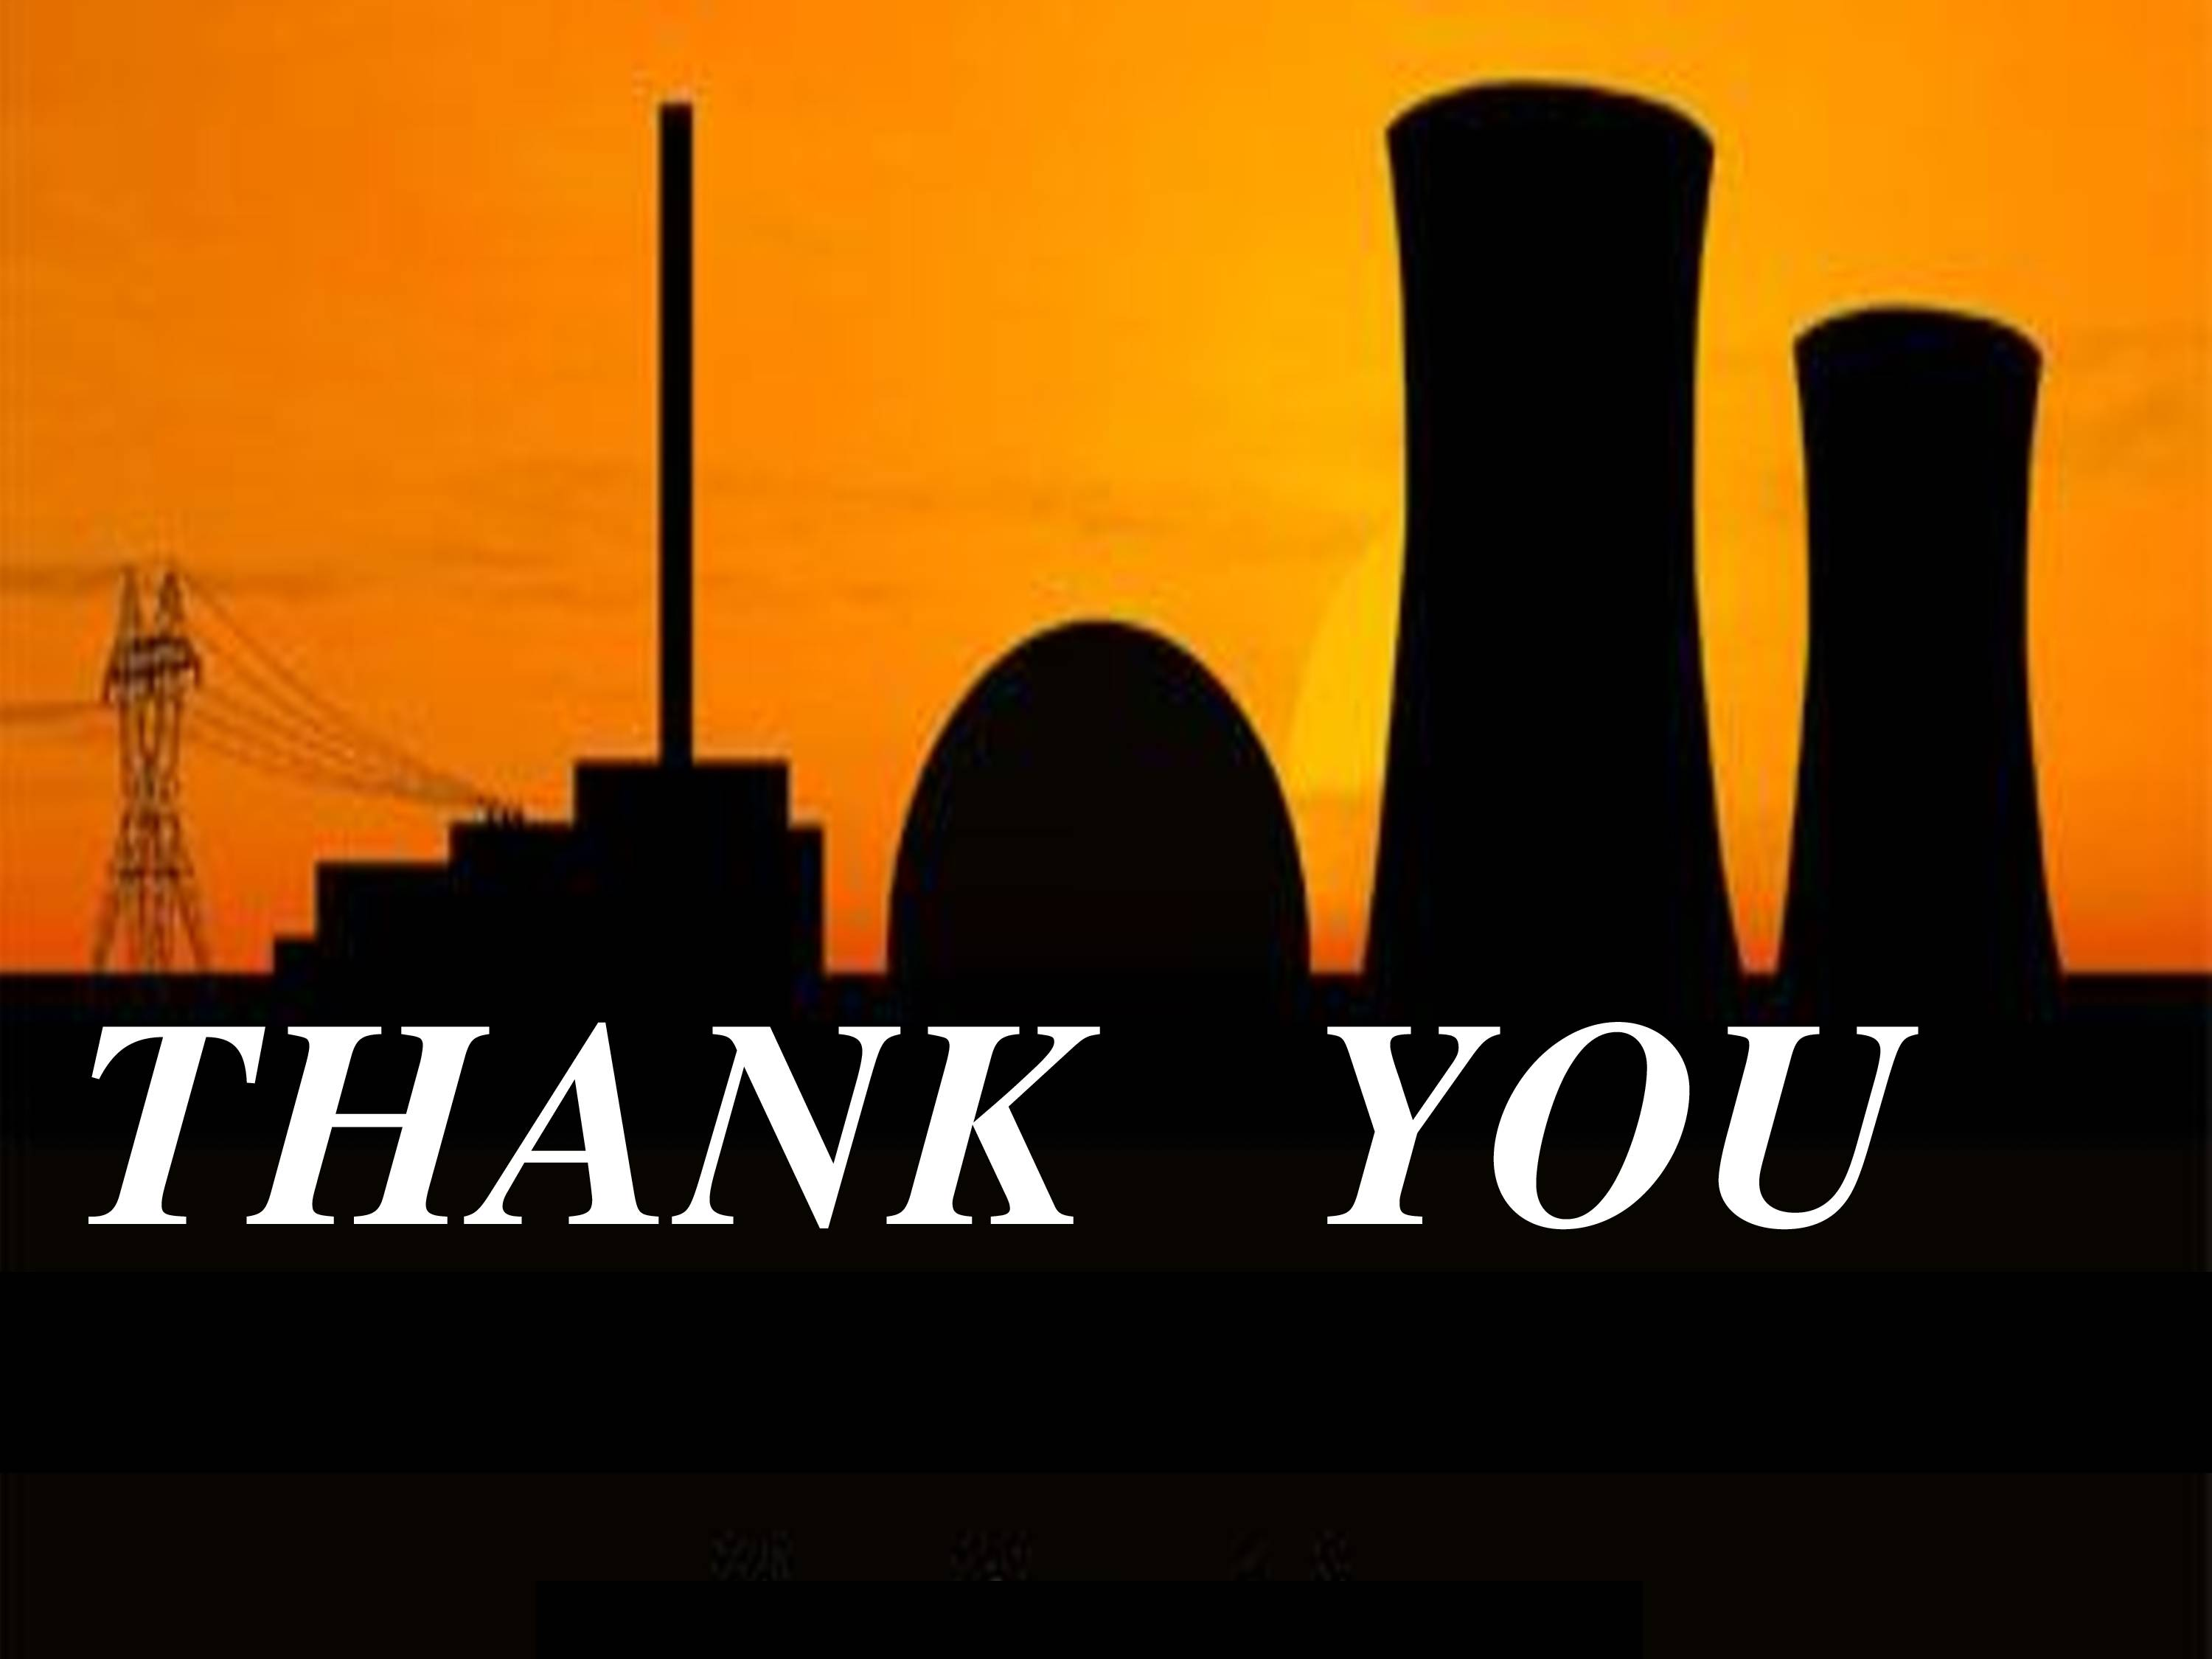